# Notebook for synthetic Biology Data inspection and question-answer validation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("synthetic_biology_dataset.csv")

In [3]:
for i in df.columns:
    print(i)

animal_type
weight_kg
height_cm
age_years
number_of_friends
birth_date
birth_unix
color
can_fly
can_swim
can_run
watches_youtube
daily_food_grams
popularity_score
social_media


## What is the most common animal type?

In [4]:
df['animal_type'].value_counts()

animal_type
bird      4000
cat       4000
fish      4000
turtle    4000
dog       4000
Name: count, dtype: int64

## What is the average weight of all animals?

In [5]:
df['weight_kg'].mean()

np.float64(22.96487517911921)

## What is the average weight of ____?
## Which animal type is heaviest on average?

In [6]:

# Group by animal name and calculate mean weight
animal_mean_weights = df.groupby('animal_type')['weight_kg'].mean()

# as a DataFrame instead of a Series
animal_mean_weights_df = df.groupby('animal_type')['weight_kg'].mean().reset_index()

# results
print("As Series:")
print(animal_mean_weights)
print("\nAs DataFrame:")
print(animal_mean_weights_df)


As Series:
animal_type
bird      29.992869
cat        5.038840
dog       10.047882
fish      20.009160
turtle    49.735625
Name: weight_kg, dtype: float64

As DataFrame:
  animal_type  weight_kg
0        bird  29.992869
1         cat   5.038840
2         dog  10.047882
3        fish  20.009160
4      turtle  49.735625


## How many friends do cats have on average?
## Which animal type has the most friends?

In [7]:

# Group by animal name and calculate mean weight
animal_mean_friends = df.groupby('animal_type')['number_of_friends'].mean()

# as a DataFrame instead of a Series
animal_mean_friends_df = df.groupby('animal_type')['number_of_friends'].mean().reset_index()

# results
print("As Series:")
print(animal_mean_friends)
print("\nAs DataFrame:")
print(animal_mean_friends_df)


As Series:
animal_type
bird      7.8195
cat       4.5535
dog       9.2070
fish      2.5175
turtle    2.1250
Name: number_of_friends, dtype: float64

As DataFrame:
  animal_type  number_of_friends
0        bird             7.8195
1         cat             4.5535
2         dog             9.2070
3        fish             2.5175
4      turtle             2.1250


## Is there a relationship between color and animal type?

In [8]:
import pandas as pd


# Step 1: Create a cross-tabulation of animal_type and color
cross_tab = pd.crosstab(df['animal_type'], df['color'])

# Step 2: Convert counts to percentages for each animal_type (rows)
percentage_df = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Round to 2 decimal places for readability
percentage_df = percentage_df.round(2)

print("Count of colors by animal_type:")
print(cross_tab)
print("\nPercentage of colors by animal_type:")
print(percentage_df)

# Optional: To get a more detailed view with both count and percentage
def color_percentage_by_animal_type(df):
    # Get counts and total counts for each animal_type
    counts = df.groupby(['animal_type', 'color']).size().reset_index(name='count')
    totals = df.groupby('animal_type').size().reset_index(name='total')

    # Merge and calculate percentages
    result = pd.merge(counts, totals, on='animal_type')
    result['percentage'] = (result['count'] / result['total'] * 100).round(2)

    return result

# Detailed result with counts and percentages
detailed_result = color_percentage_by_animal_type(df)
print("\nDetailed breakdown:")
print(detailed_result)

Count of colors by animal_type:
color        blue  gray  green  mixed   red
animal_type                                
bird          162  3383    164    135   156
cat           150   170    153    149  3378
dog           143   157   3360    182   158
fish         3329   175    168    159   169
turtle        152   148    164   3375   161

Percentage of colors by animal_type:
color         blue   gray  green  mixed    red
animal_type                                   
bird          4.05  84.58   4.10   3.38   3.90
cat           3.75   4.25   3.82   3.72  84.45
dog           3.58   3.92  84.00   4.55   3.95
fish         83.22   4.38   4.20   3.98   4.23
turtle        3.80   3.70   4.10  84.38   4.03

Detailed breakdown:
   animal_type  color  count  total  percentage
0         bird   blue    162   4000        4.05
1         bird   gray   3383   4000       84.58
2         bird  green    164   4000        4.10
3         bird  mixed    135   4000        3.38
4         bird    red    156   4

## What percentage of ___ [each] animals can _____ ['can_fly', 'can_swim', 'can_run']?

In [9]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'df' with these columns
# If not, replace this with your actual data loading code
# Example:
# df = pd.read_csv('your_data.csv')

# Calculate the percentage of True values for each capability by animal type
def calculate_percentages(df):
    # List of boolean columns to analyze
    boolean_columns = ['can_fly', 'can_swim', 'can_run']

    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame()

    # For each animal type and boolean column, calculate percentage of True values
    for column in boolean_columns:
        # Group by animal_type and calculate the mean (which gives percentage of True values for boolean columns)
        percentage = df.groupby('animal_type')[column].mean() * 100

        # Rename the series to show it's a percentage
        percentage = percentage.rename(f"{column}_true_percent")

        # Add to the result DataFrame
        if result_df.empty:
            result_df = pd.DataFrame(percentage)
        else:
            result_df = pd.concat([result_df, pd.DataFrame(percentage)], axis=1)

        # Calculate percentage of False values
        result_df[f"{column}_false_percent"] = 100 - result_df[f"{column}_true_percent"]

    # Reset index to make animal_type a column
    result_df = result_df.reset_index()

    return result_df

# Apply the function to your DataFrame
result = calculate_percentages(df)

# Print the result
print(result)

# Optional: For a more detailed view, you can also get the counts
def get_detailed_counts(df):
    # List of boolean columns to analyze
    boolean_columns = ['can_fly', 'can_swim', 'can_run']

    # Create a list to store results
    results = []

    for column in boolean_columns:
        # Cross-tabulation of animal_type vs. the boolean column
        cross_tab = pd.crosstab(
            df['animal_type'],
            df[column],
            normalize='index'
        ) * 100

        # Rename columns for clarity
        cross_tab.columns = [f"{column}_false_percent", f"{column}_true_percent"]

        # Add counts
        counts = pd.crosstab(df['animal_type'], df[column])
        cross_tab[f"{column}_false_count"] = counts[False]
        cross_tab[f"{column}_true_count"] = counts[True]

        # Add to results
        cross_tab = cross_tab.reset_index()
        results.append(cross_tab)

    # Merge all results
    final_result = results[0]
    for res in results[1:]:
        final_result = pd.merge(final_result, res, on='animal_type')

    return final_result

# Get detailed counts and percentages
detailed_result = get_detailed_counts(df)
print("\nDetailed Results with Counts:")
print(detailed_result)

  animal_type  can_fly_true_percent  can_fly_false_percent  \
0        bird                49.250                 50.750   
1         cat                49.825                 50.175   
2         dog                48.975                 51.025   
3        fish                51.350                 48.650   
4      turtle                49.850                 50.150   

   can_swim_true_percent  can_swim_false_percent  can_run_true_percent  \
0                 88.925                  11.075                86.900   
1                 90.775                   9.225                49.300   
2                  9.825                  90.175                49.875   
3                  9.775                  90.225                50.125   
4                 10.550                  89.450                51.025   

   can_run_false_percent  
0                 13.100  
1                 50.700  
2                 50.125  
3                 49.875  
4                 48.975  

Detailed Results wi

## ## What percentage of ___ [color of animal] animals can _____ ['can_fly', 'can_swim', 'can_run']?

In [10]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called 'df' with these columns
# If not, replace this with your actual data loading code
# Example:
# df = pd.read_csv('your_data.csv')

# Calculate the percentage of True values for each capability by animal type
def calculate_percentages(df):
    # List of boolean columns to analyze
    boolean_columns = ['can_fly', 'can_swim', 'can_run']

    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame()

    # For each animal type and boolean column, calculate percentage of True values
    for column in boolean_columns:
        # Group by color and calculate the mean (which gives percentage of True values for boolean columns)
        percentage = df.groupby('color')[column].mean() * 100

        # Rename the series to show it's a percentage
        percentage = percentage.rename(f"{column}_true_percent")

        # Add to the result DataFrame
        if result_df.empty:
            result_df = pd.DataFrame(percentage)
        else:
            result_df = pd.concat([result_df, pd.DataFrame(percentage)], axis=1)

        # Calculate percentage of False values
        result_df[f"{column}_false_percent"] = 100 - result_df[f"{column}_true_percent"]

    # Reset index to make color a column
    result_df = result_df.reset_index()

    return result_df

# Apply the function to your DataFrame
result = calculate_percentages(df)

# Print the result
print(result)

# Optional: For a more detailed view, you can also get the counts
def get_detailed_counts(df):
    # List of boolean columns to analyze
    boolean_columns = ['can_fly', 'can_swim', 'can_run']

    # Create a list to store results
    results = []

    for column in boolean_columns:
        # Cross-tabulation of color vs. the boolean column
        cross_tab = pd.crosstab(
            df['color'],
            df[column],
            normalize='index'
        ) * 100

        # Rename columns for clarity
        cross_tab.columns = [f"{column}_false_percent", f"{column}_true_percent"]

        # Add counts
        counts = pd.crosstab(df['color'], df[column])
        cross_tab[f"{column}_false_count"] = counts[False]
        cross_tab[f"{column}_true_count"] = counts[True]

        # Add to results
        cross_tab = cross_tab.reset_index()
        results.append(cross_tab)

    # Merge all results
    final_result = results[0]
    for res in results[1:]:
        final_result = pd.merge(final_result, res, on='color')

    return final_result

# Get detailed counts and percentages
detailed_result = get_detailed_counts(df)
print("\nDetailed Results with Counts:")
print(detailed_result)

   color  can_fly_true_percent  can_fly_false_percent  can_swim_true_percent  \
0   blue             51.092480              48.907520              15.752033   
1   gray             49.541284              50.458716              79.692537   
2  green             49.588426              50.411574              16.562734   
3  mixed             48.825000              51.175000              16.175000   
4    red             50.223769              49.776231              80.780706   

   can_swim_false_percent  can_run_true_percent  can_run_false_percent  
0               84.247967             51.727642              48.272358  
1               20.307463             80.535581              19.464419  
2               83.437266             52.082814              47.917186  
3               83.825000             52.975000              47.025000  
4               19.219294             49.676778              50.323222  

Detailed Results with Counts:
   color  can_fly_false_percent  can_fly_true_perc

## What is the average weight of blue animals compared to green ones?

Average weight of blue animals: 20.66 kg
Average weight of green animals: 12.64 kg
Difference: 8.02 kg


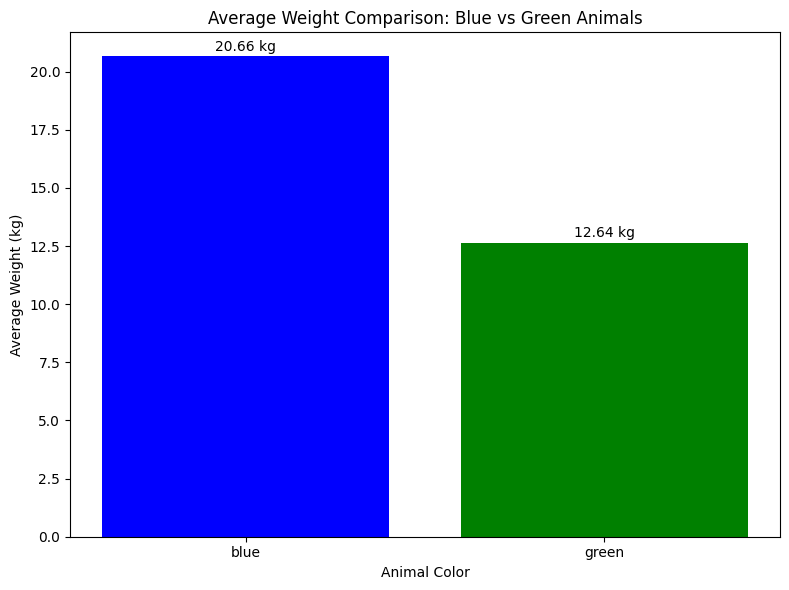


Weight statistics by color:
            mean  count        std
color                             
blue   20.656366   3936   8.804154
gray   28.468243   4033  10.755569
green  12.640810   4009   9.539673
mixed  44.466398   4000  15.935421
red     8.612389   4022  10.596754

T-test results: t-statistic = 38.9299, p-value = 0.0000
The difference is statistically significant at the 0.05 level.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Filter the DataFrame for blue and green animals
blue_animals = df[df['color'] == 'blue']
green_animals = df[df['color'] == 'green']

# Calculate the average weight for each group
blue_avg_weight = blue_animals['weight_kg'].mean()
green_avg_weight = green_animals['weight_kg'].mean()

# Print the results
print(f"Average weight of blue animals: {blue_avg_weight:.2f} kg")
print(f"Average weight of green animals: {green_avg_weight:.2f} kg")
print(f"Difference: {abs(blue_avg_weight - green_avg_weight):.2f} kg")

# Optional: Create a bar chart to visualize the comparison
colors = ['blue', 'green']
avg_weights = [blue_avg_weight, green_avg_weight]

plt.figure(figsize=(8, 6))
bars = plt.bar(colors, avg_weights, color=colors)
plt.title('Average Weight Comparison: Blue vs Green Animals')
plt.xlabel('Animal Color')
plt.ylabel('Average Weight (kg)')

# Add the values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f} kg', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: You can also group by color and get statistics for all colors at once
color_weight_stats = df.groupby('color')['weight_kg'].agg(['mean', 'count', 'std'])
print("\nWeight statistics by color:")
print(color_weight_stats)

# Optional: Statistical test to see if the difference is significant
from scipy import stats

t_stat, p_value = stats.ttest_ind(blue_animals['weight_kg'], green_animals['weight_kg'], equal_var=False)
print(f"\nT-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
print(f"The difference is {'statistically significant' if p_value < 0.05 else 'not statistically significant'} at the 0.05 level.")

## When do most animals tend to be born?
## Is there a seasonal pattern to births?

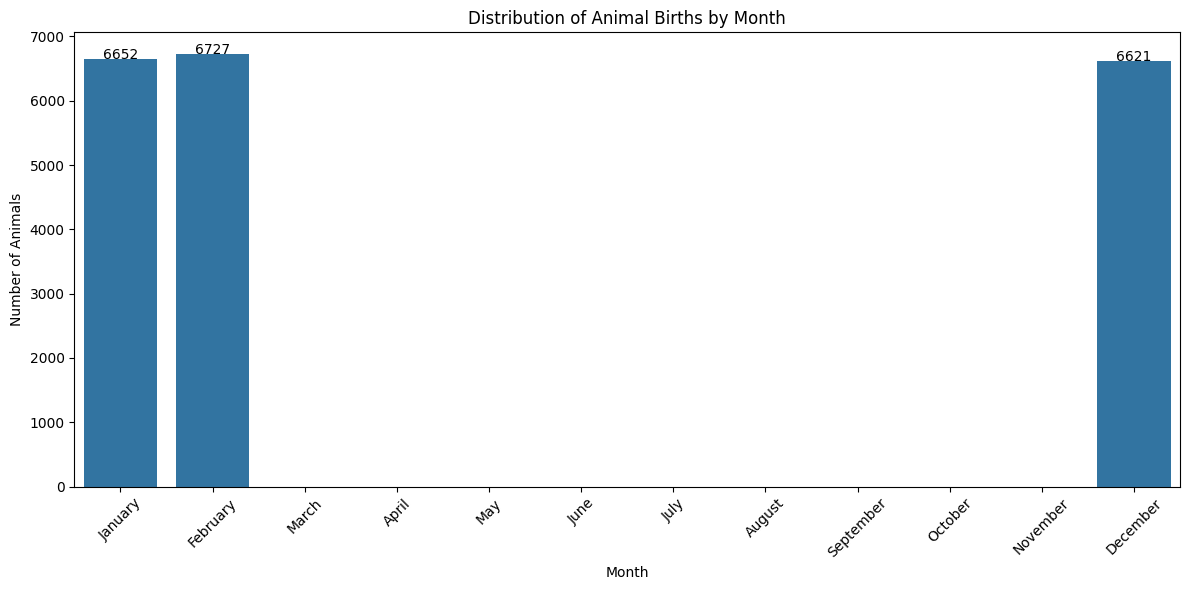

<ipython-input-12-693829bf7a77>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette=['#8dd3c7', '#fb8072', '#bebada', '#80b1d3'])


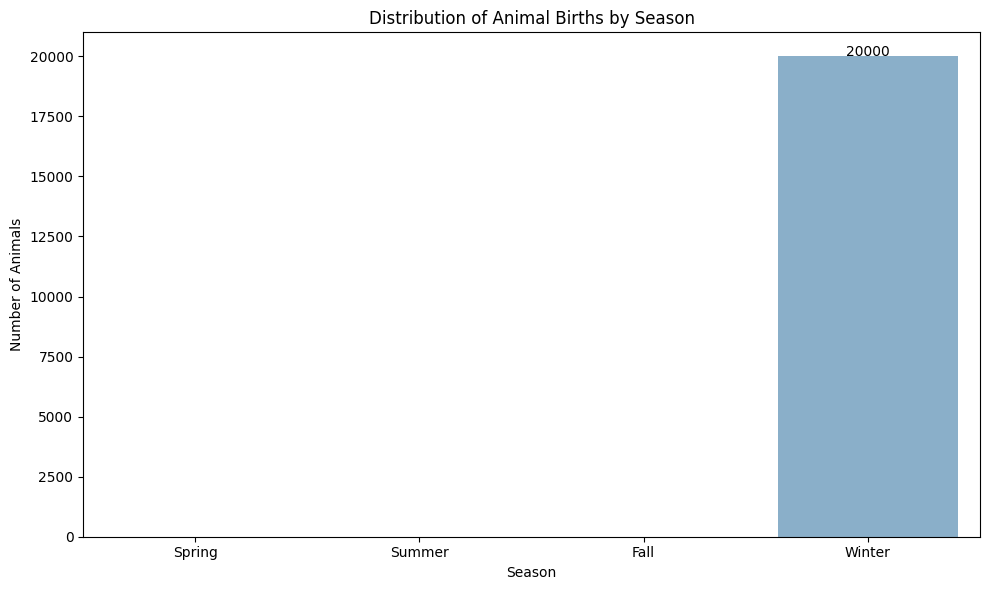

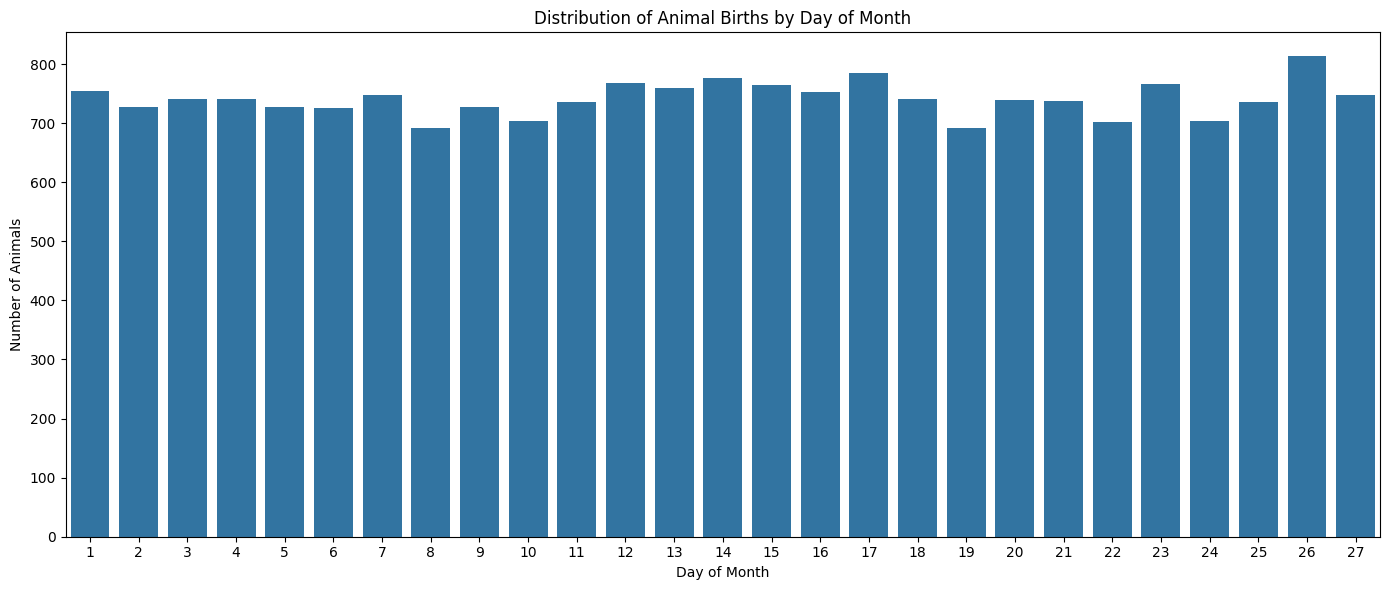

Birth Month Summary:
birth_month_name
February    6727
January     6652
December    6621
Name: count, dtype: int64

Birth Season Summary:
birth_season
Winter    20000
Name: count, dtype: int64


<Figure size 1400x800 with 0 Axes>

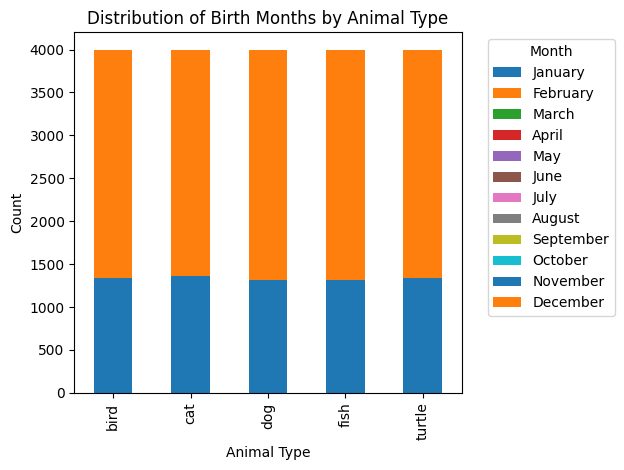

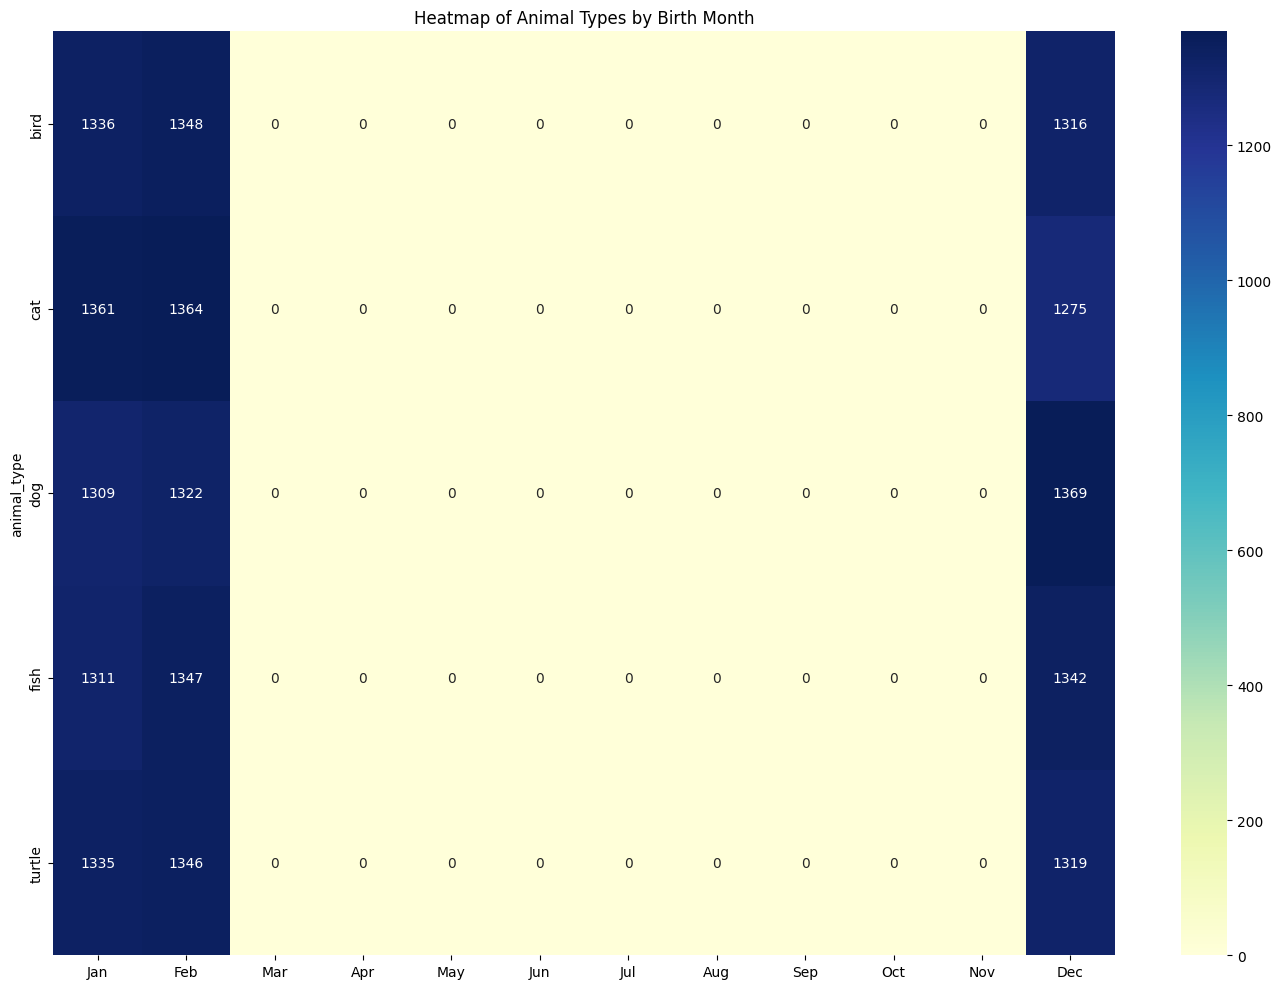


Peak birth time: February with 6727 births
Peak birth season: Winter with 20000 births


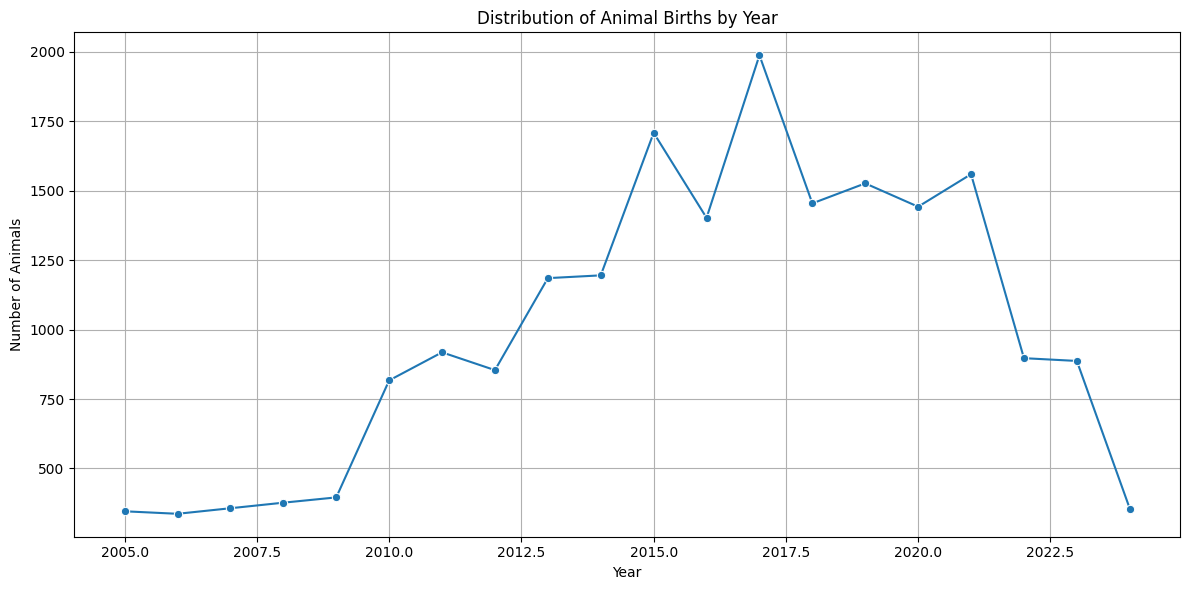

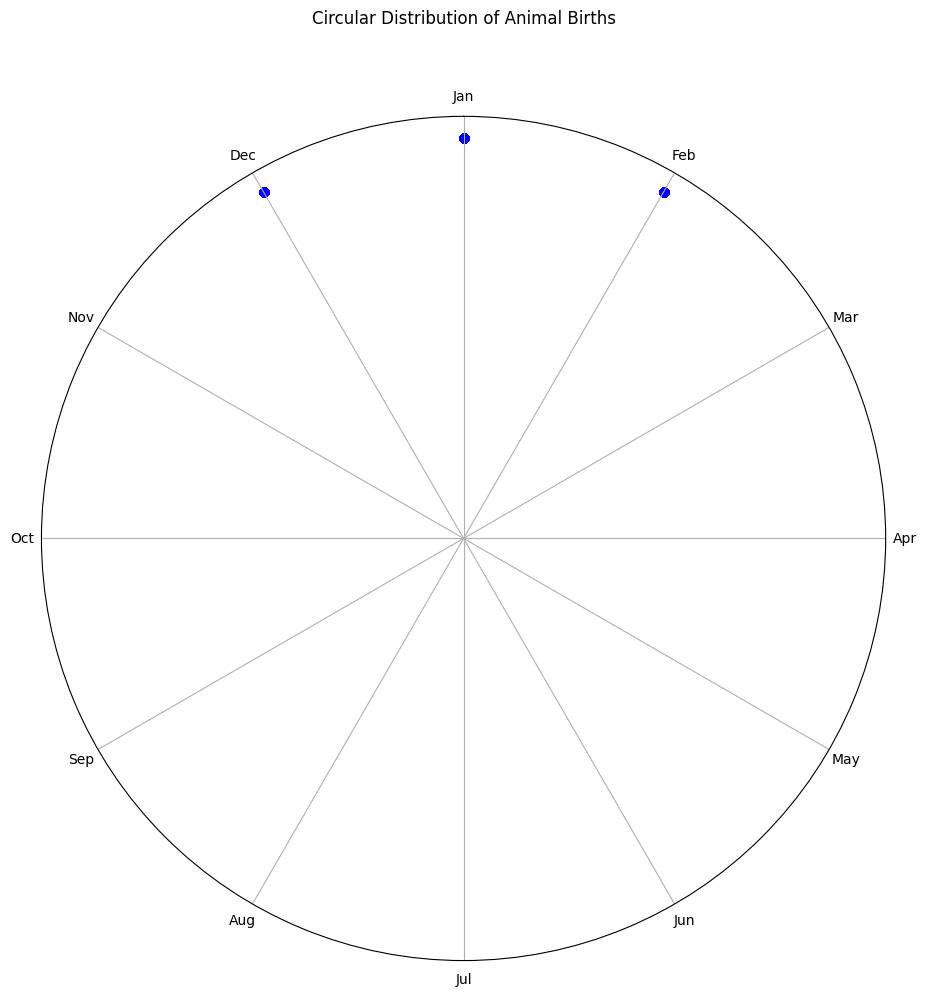

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assume df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Make sure birth_date is in datetime format
if 'birth_unix' in df.columns:
    df['birth_date'] = pd.to_datetime(df['birth_unix'], unit='s')
elif 'birth_date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['birth_date']):
    df['birth_date'] = pd.to_datetime(df['birth_date'])

# Extract month and season from birth_date
df['birth_month'] = df['birth_date'].dt.month
df['birth_month_name'] = df['birth_date'].dt.month_name()
df['birth_day'] = df['birth_date'].dt.day
df['birth_year'] = df['birth_date'].dt.year

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['birth_season'] = df['birth_month'].apply(get_season)

# 1. Monthly distribution
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['birth_month_name'].value_counts()
month_counts = month_counts.reindex(month_order, fill_value=0)
ax = sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Distribution of Animal Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Animals')
plt.xticks(rotation=45)

# Add counts above bars
for i, count in enumerate(month_counts.values):
    if count > 0:  # Only add text for non-zero values
        ax.text(i, count + 0.1, str(int(count)), ha='center')

plt.tight_layout()
plt.show()

# 2. Seasonal distribution
plt.figure(figsize=(10, 6))
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_counts = df['birth_season'].value_counts()
season_counts = season_counts.reindex(season_order, fill_value=0)
ax = sns.barplot(x=season_counts.index, y=season_counts.values, palette=['#8dd3c7', '#fb8072', '#bebada', '#80b1d3'])
plt.title('Distribution of Animal Births by Season')
plt.xlabel('Season')
plt.ylabel('Number of Animals')

# Add counts above bars
for i, count in enumerate(season_counts.values):
    if count > 0:  # Only add text for non-zero values
        ax.text(i, count + 0.1, str(int(count)), ha='center')

plt.tight_layout()
plt.show()

# 3. Day of month distribution
plt.figure(figsize=(14, 6))
day_counts = df['birth_day'].value_counts().sort_index()
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Distribution of Animal Births by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Animals')
plt.tight_layout()
plt.show()

# 4. Summary statistics
print("Birth Month Summary:")
month_summary = df['birth_month_name'].value_counts().sort_values(ascending=False)
print(month_summary)

print("\nBirth Season Summary:")
season_summary = df['birth_season'].value_counts().sort_values(ascending=False)
print(season_summary)

# 5. Analyze by animal type - stacked bar chart
plt.figure(figsize=(14, 8))
animal_month_counts = pd.crosstab(df['animal_type'], df['birth_month_name'])
# Ensure all months are included with the correct order
for month in month_order:
    if month not in animal_month_counts.columns:
        animal_month_counts[month] = 0
animal_month_counts = animal_month_counts[month_order]
animal_month_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Birth Months by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Heatmap of animal types by birth month - FIXED
plt.figure(figsize=(14, 10))
# Create a month mapping for all possible months
month_mapping = {i: name[:3] for i, name in enumerate(month_order, 1)}
animal_month_pivot = pd.crosstab(df['animal_type'], df['birth_month'])

# Ensure all months are represented (1-12)
for month in range(1, 13):
    if month not in animal_month_pivot.columns:
        animal_month_pivot[month] = 0

# Sort columns and rename them
animal_month_pivot = animal_month_pivot.sort_index(axis=1)
animal_month_pivot.columns = [month_mapping[i] for i in animal_month_pivot.columns]

# Create the heatmap
sns.heatmap(animal_month_pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Animal Types by Birth Month')
plt.tight_layout()
plt.show()

# 7. Find the peak birth time
peak_month = df['birth_month_name'].value_counts().idxmax()
peak_month_count = df['birth_month_name'].value_counts().max()
peak_season = df['birth_season'].value_counts().idxmax()
peak_season_count = df['birth_season'].value_counts().max()

print(f"\nPeak birth time: {peak_month} with {peak_month_count} births")
print(f"Peak birth season: {peak_season} with {peak_season_count} births")

# Year-over-year trends if applicable
if df['birth_year'].nunique() > 1:
    plt.figure(figsize=(12, 6))
    year_counts = df['birth_year'].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
    plt.title('Distribution of Animal Births by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Animals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 8. Circular plot for month distribution (shows cyclical nature of months)
plt.figure(figsize=(10, 10))
# Convert months to angles (in radians)
months = np.array(df['birth_month'])
angles = 2 * np.pi * (months - 1) / 12

# Create polar scatter plot
ax = plt.subplot(111, projection='polar')
ax.scatter(angles, np.ones_like(angles), c='blue', alpha=0.2)

# Set the direction and starting position
ax.set_theta_direction(-1)  # clockwise
ax.set_theta_offset(np.pi/2)  # start from top (December)

# Set labels
labels = [month[:3] for month in month_order]
ax.set_xticks(2 * np.pi * np.arange(12) / 12)
ax.set_xticklabels(labels)
ax.set_title('Circular Distribution of Animal Births', y=1.1)
ax.set_yticks([])  # Hide radial ticks
plt.tight_layout()
plt.show()

## How many animals were born in the first quarter of the year?

Total number of animals: 20000
Number of animals born in Q1 (Jan-Mar): 13379
Percentage of animals born in Q1: 66.90%

Breakdown by month:
January: 6652 animals
February: 6727 animals
March: 0 animals

Breakdown by animal type (Q1 only):
cat: 2725 animals
bird: 2684 animals
turtle: 2681 animals
fish: 2658 animals
dog: 2631 animals


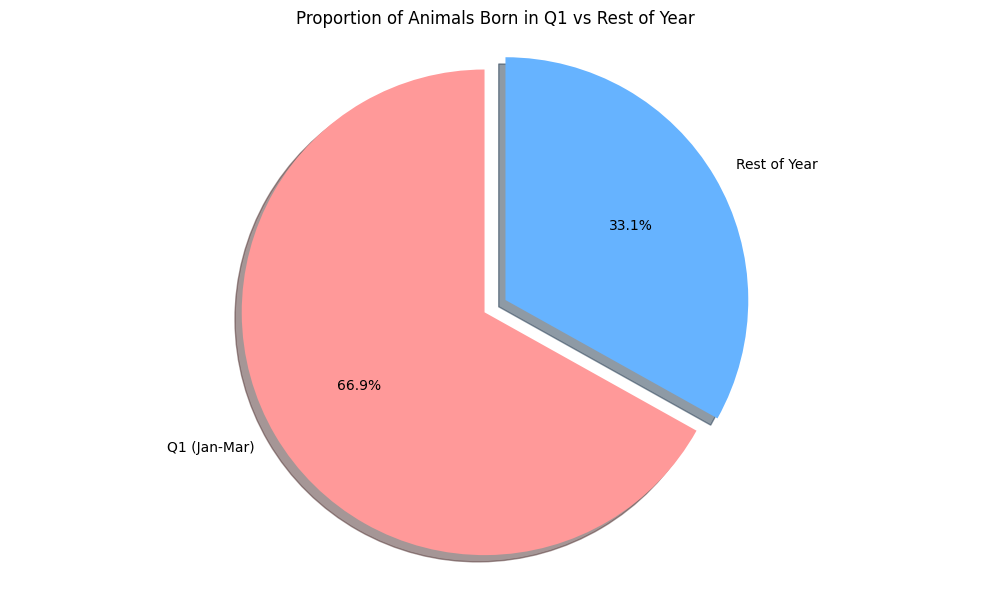

<ipython-input-13-8ceb10844711>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=all_month_counts.index, y=all_month_counts.values, palette=colors)


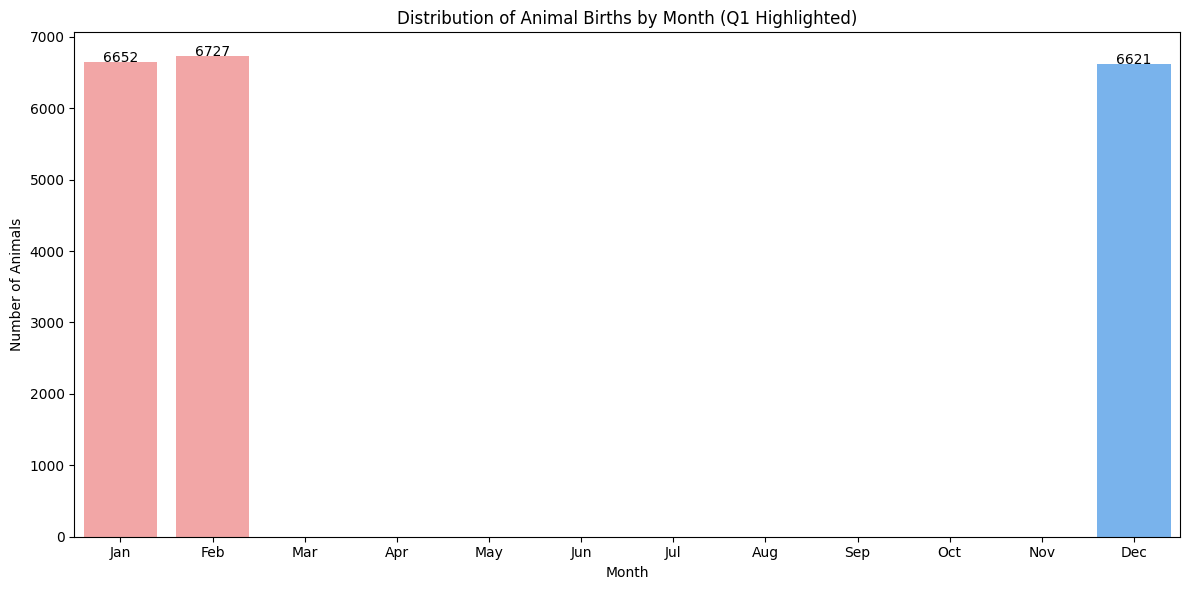

<ipython-input-13-8ceb10844711>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[f'Q{q}' for q in quarter_counts.index], y=quarter_counts.values, palette=colors)
<ipython-input-13-8ceb10844711>:93: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(x=[f'Q{q}' for q in quarter_counts.index], y=quarter_counts.values, palette=colors)


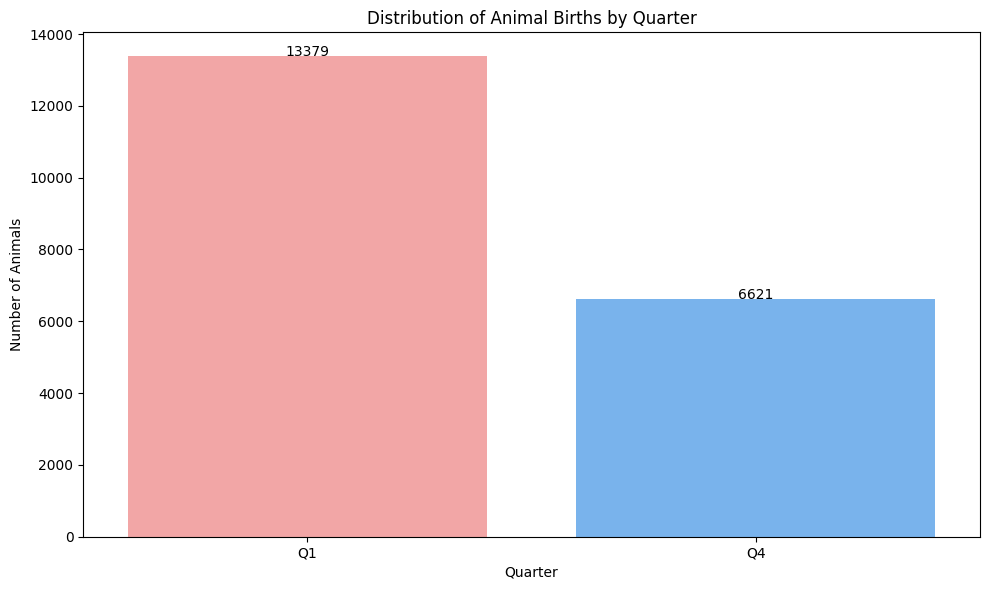

<ipython-input-13-8ceb10844711>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='animal_type', y='q1_percent', data=animal_q1_df, palette='viridis')


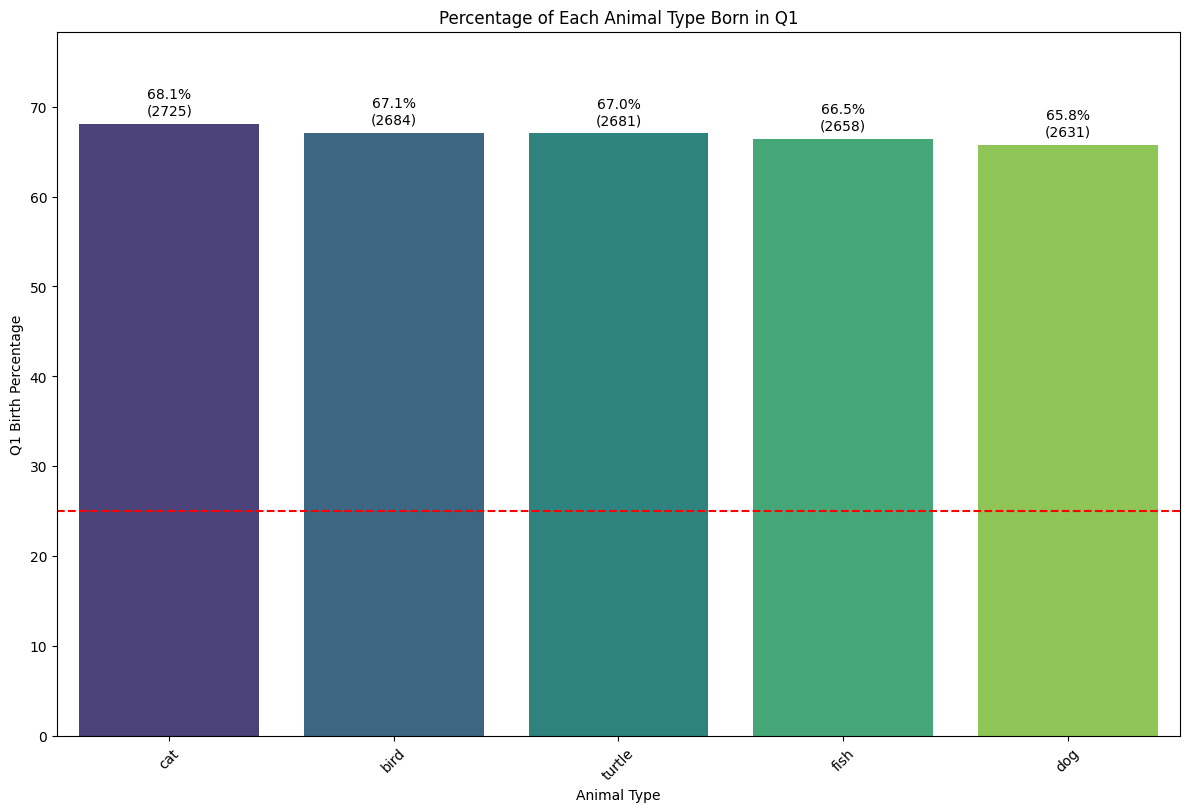

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Convert birth dates to datetime if needed
if 'birth_unix' in df.columns:
    df['birth_date'] = pd.to_datetime(df['birth_unix'], unit='s')
elif 'birth_date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['birth_date']):
    df['birth_date'] = pd.to_datetime(df['birth_date'])

# Extract month from birth_date
df['birth_month'] = df['birth_date'].dt.month
df['birth_quarter'] = pd.PeriodIndex(df['birth_date'], freq='Q').astype(str)
df['quarter'] = df['birth_date'].dt.quarter

# Define first quarter (Q1) animals
q1_animals = df[df['birth_month'].isin([1, 2, 3])]

# Calculate total counts and percentages
total_animals = len(df)
q1_count = len(q1_animals)
q1_percentage = (q1_count / total_animals) * 100 if total_animals > 0 else 0

# Print the results
print(f"Total number of animals: {total_animals}")
print(f"Number of animals born in Q1 (Jan-Mar): {q1_count}")
print(f"Percentage of animals born in Q1: {q1_percentage:.2f}%")

# Break down by specific months in Q1
q1_months = q1_animals['birth_month'].map({1: 'January', 2: 'February', 3: 'March'})
month_counts = q1_months.value_counts().reindex(['January', 'February', 'March'], fill_value=0)
print("\nBreakdown by month:")
for month, count in month_counts.items():
    print(f"{month}: {count} animals")

# Break down by animal type
if 'animal_type' in q1_animals.columns:
    animal_type_counts = q1_animals['animal_type'].value_counts()
    print("\nBreakdown by animal type (Q1 only):")
    for animal_type, count in animal_type_counts.items():
        print(f"{animal_type}: {count} animals")

# Visualizations

# 1. Pie chart showing Q1 vs rest of year
plt.figure(figsize=(10, 6))
labels = ['Q1 (Jan-Mar)', 'Rest of Year']
sizes = [q1_count, total_animals - q1_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Q1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Animals Born in Q1 vs Rest of Year')
plt.tight_layout()
plt.show()

# 2. Bar chart of monthly distribution for the entire year
plt.figure(figsize=(12, 6))
all_months = df['birth_month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
all_month_counts = all_months.value_counts().reindex(month_order, fill_value=0)

# Highlight Q1 months
colors = ['#ff9999' if month in ['Jan', 'Feb', 'Mar'] else '#66b3ff' for month in month_order]
ax = sns.barplot(x=all_month_counts.index, y=all_month_counts.values, palette=colors)
plt.title('Distribution of Animal Births by Month (Q1 Highlighted)')
plt.xlabel('Month')
plt.ylabel('Number of Animals')

# Add counts on top of bars
for i, count in enumerate(all_month_counts.values):
    if count > 0:
        ax.text(i, count + 0.1, str(int(count)), ha='center')

plt.tight_layout()
plt.show()

# 3. Quarter comparison
plt.figure(figsize=(10, 6))
quarter_counts = df['quarter'].value_counts().sort_index()
quarter_labels = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create bars with different colors
ax = sns.barplot(x=[f'Q{q}' for q in quarter_counts.index], y=quarter_counts.values, palette=colors)
plt.title('Distribution of Animal Births by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Animals')

# Add counts on top of bars
for i, count in enumerate(quarter_counts.values):
    if count > 0:
        ax.text(i, count + 0.1, str(int(count)), ha='center')

plt.tight_layout()
plt.show()

# 4. For each animal type, what percentage were born in Q1?
if 'animal_type' in df.columns:
    plt.figure(figsize=(12, 8))

    # Calculate Q1 percentage for each animal type
    animal_q1_percent = []
    for animal in df['animal_type'].unique():
        total = df[df['animal_type'] == animal].shape[0]
        q1_total = df[(df['animal_type'] == animal) & (df['birth_month'].isin([1, 2, 3]))].shape[0]
        percent = (q1_total / total) * 100 if total > 0 else 0
        animal_q1_percent.append({'animal_type': animal, 'q1_percent': percent, 'count': q1_total})

    animal_q1_df = pd.DataFrame(animal_q1_percent).sort_values('q1_percent', ascending=False)

    # Plot
    ax = sns.barplot(x='animal_type', y='q1_percent', data=animal_q1_df, palette='viridis')
    plt.title('Percentage of Each Animal Type Born in Q1')
    plt.xlabel('Animal Type')
    plt.ylabel('Q1 Birth Percentage')
    plt.axhline(y=25, color='red', linestyle='--')  # 25% line as reference (equal distribution)

    # Add percentage labels
    for i, row in enumerate(animal_q1_df.itertuples()):
        ax.text(i, row.q1_percent + 1, f'{row.q1_percent:.1f}%\n({row.count})', ha='center')

    plt.ylim(0, max(animal_q1_df['q1_percent']) * 1.15)  # Make room for labels
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

In [14]:
import pandas as pd

# Assuming df is your DataFrame with animal data
# Convert birth dates to datetime if needed
if 'birth_unix' in df.columns:
    df['birth_date'] = pd.to_datetime(df['birth_unix'], unit='s')
elif 'birth_date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['birth_date']):
    df['birth_date'] = pd.to_datetime(df['birth_date'])

# Extract month from birth_date
df['birth_month'] = df['birth_date'].dt.month

# Count animals born in Q1 (months 1, 2, and 3)
q1_count = df[df['birth_month'].isin([1, 2, 3])].shape[0]

print(f"Number of animals born in the first quarter (Jan-Mar): {q1_count}")

Number of animals born in the first quarter (Jan-Mar): 13379


## Is there a correlation between weight and height?

### Correlation coefficient:

Pearson correlation coefficient (r): -0.9716
P-value: 0.0000
Interpretation: There is a strong statistically significant correlation between weight and height.
The r² value is 0.9439, meaning approximately 94.4% of the 
variation in weight can be explained by height (or vice versa).


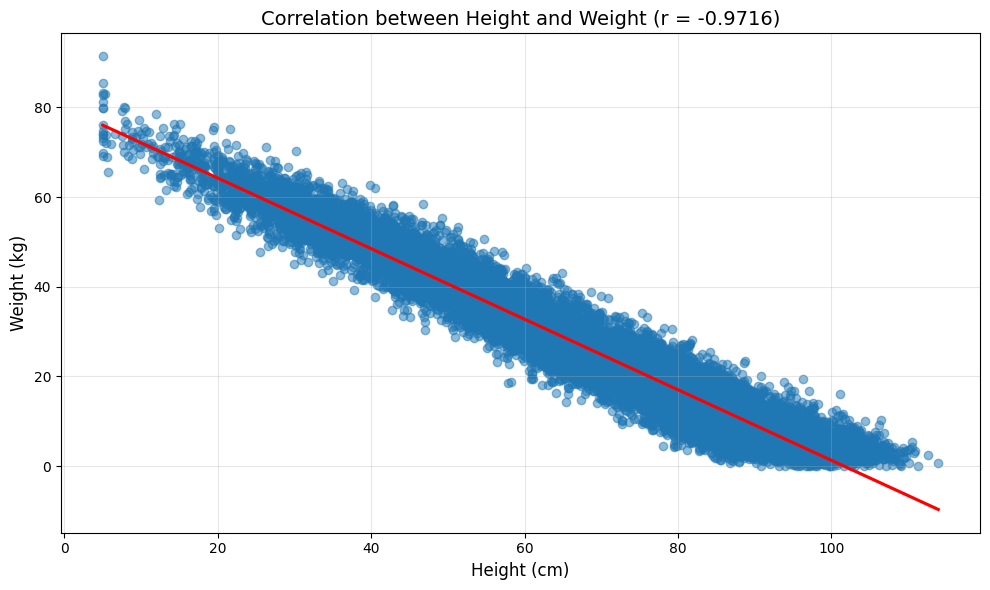

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame with animal data
# Calculate Pearson correlation coefficient between weight and height
correlation, p_value = stats.pearsonr(df['weight_kg'], df['height_cm'])

print(f"Pearson correlation coefficient (r): {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the correlation strength
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

# Interpret statistical significance
if p_value < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

print(f"Interpretation: There is a {strength} {significance} correlation between weight and height.")
print(f"The r² value is {correlation**2:.4f}, meaning approximately {(correlation**2)*100:.1f}% of the ")
print(f"variation in weight can be explained by height (or vice versa).")

# Create a scatter plot with regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='height_cm', y='weight_kg', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Correlation between Height and Weight (r = {correlation:.4f})', fontsize=14)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Is there a relationship between age and number of friends?


Correlation Coefficients with daily_food_grams:
weight_kg: r = -0.8054
height_cm: r = 0.7831
number_of_friends: r = 0.2791
birth_unix: r = 0.1089
birth_year: r = 0.1088
age_years: r = -0.1088
birth_day: r = 0.0132
popularity_score: r = -0.0103
birth_month: r = 0.0039
quarter: r = 0.0035


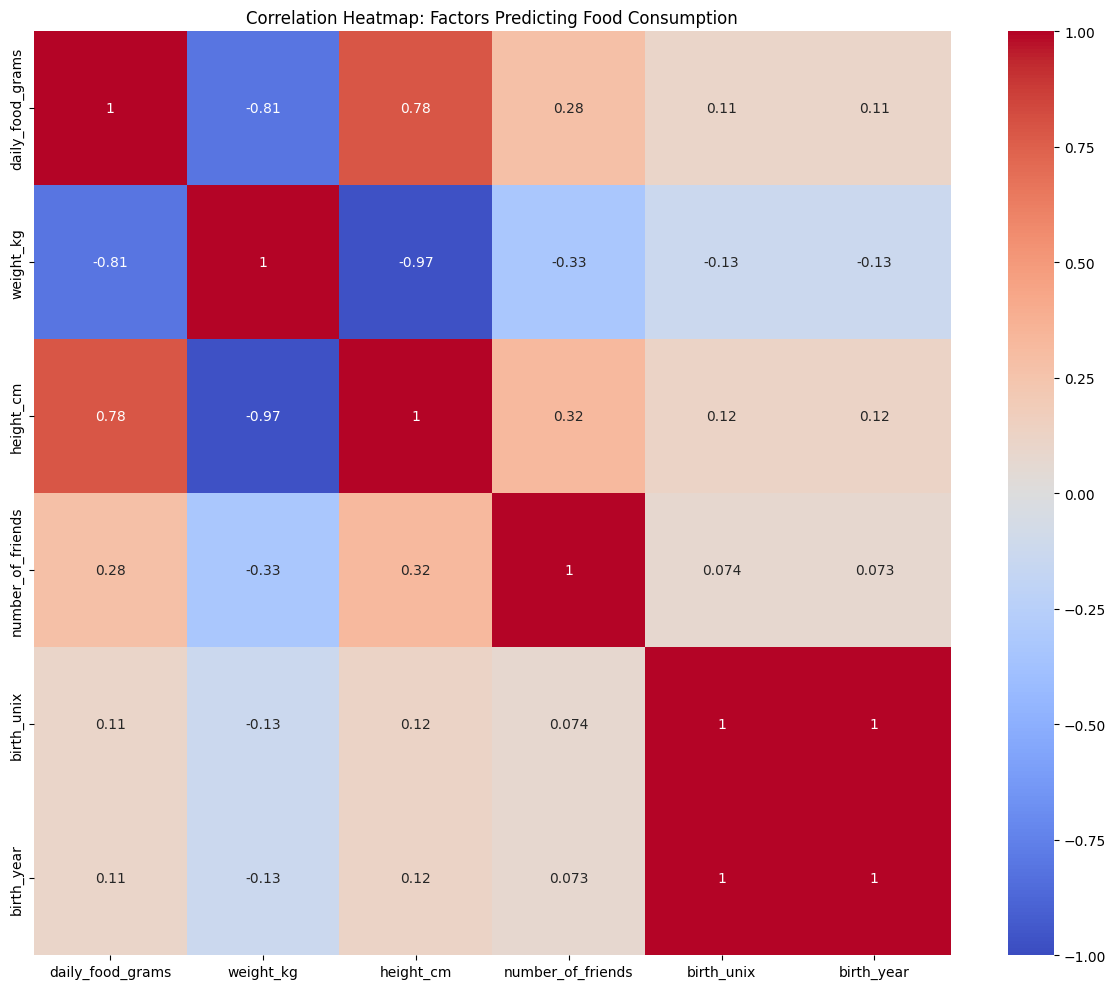

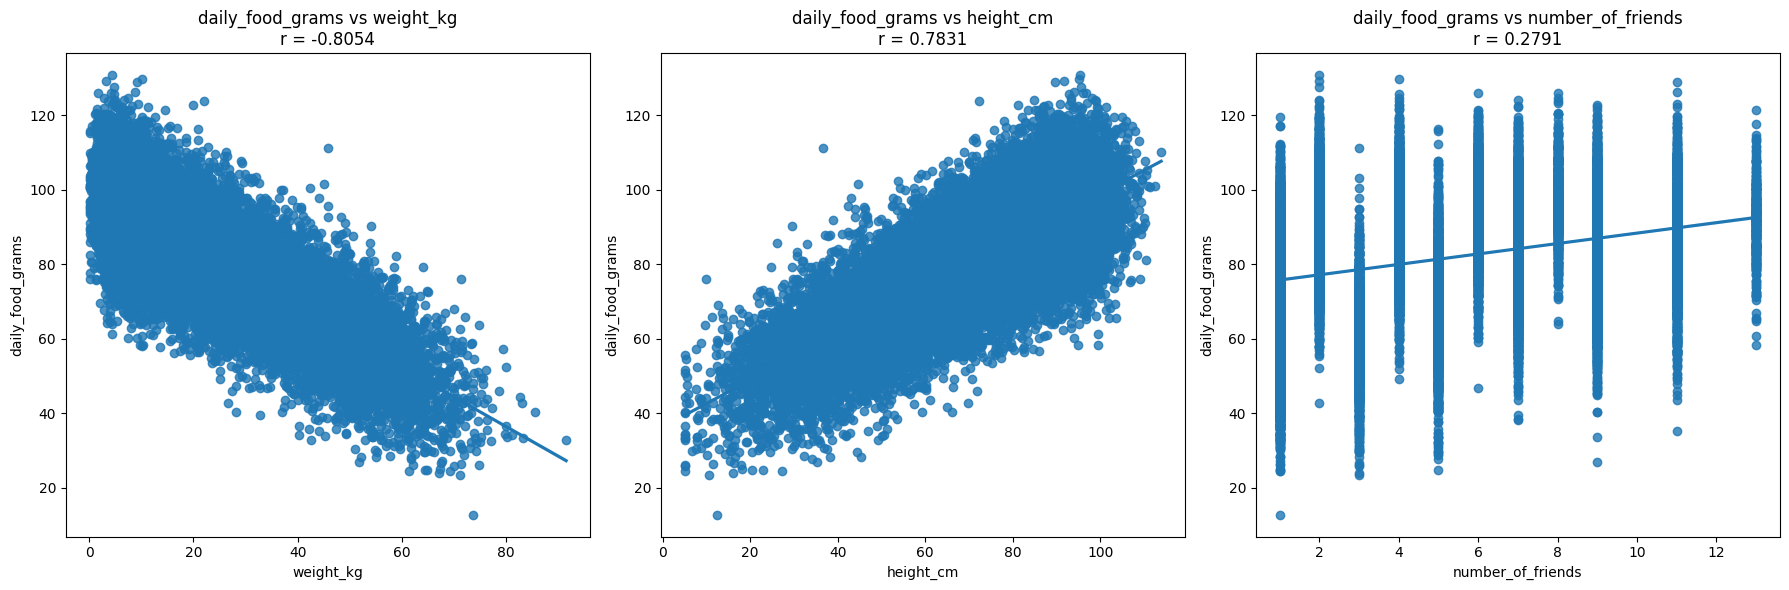

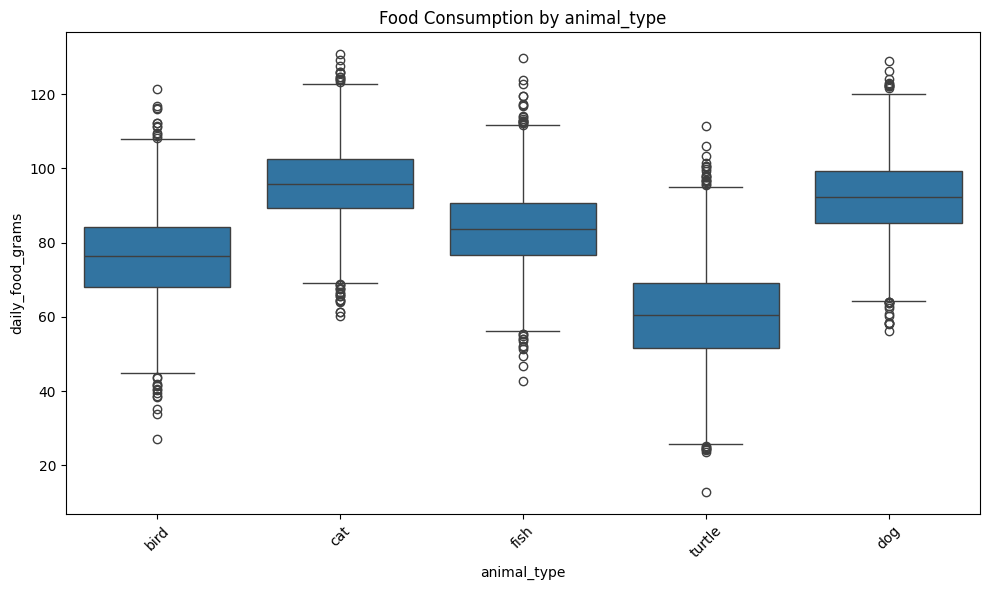


ANOVA for animal_type: F=6406.3000, p=0.0000
Significant difference in food consumption based on animal_type (p < 0.05)


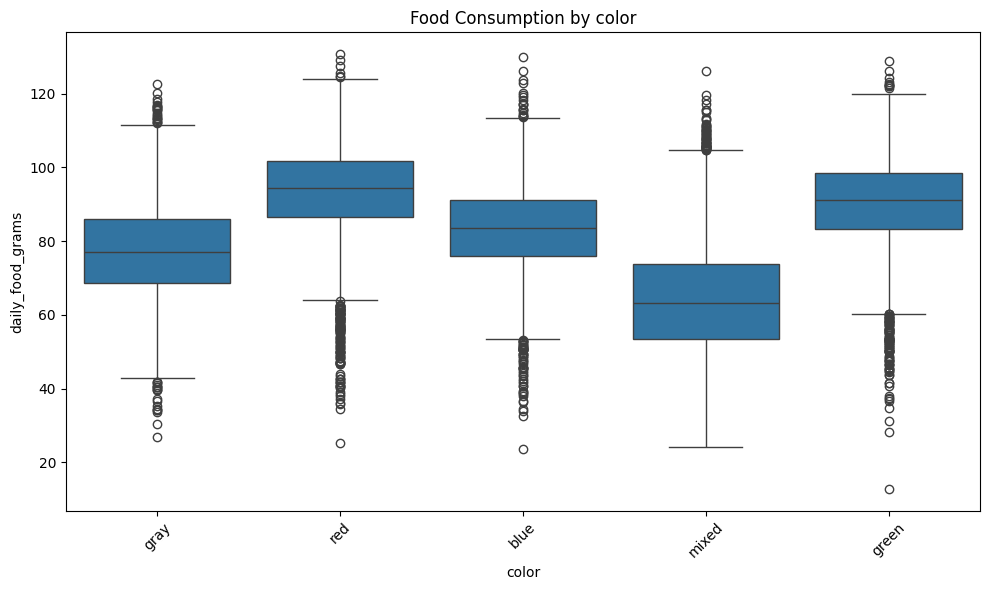


ANOVA for color: F=2852.4005, p=0.0000
Significant difference in food consumption based on color (p < 0.05)


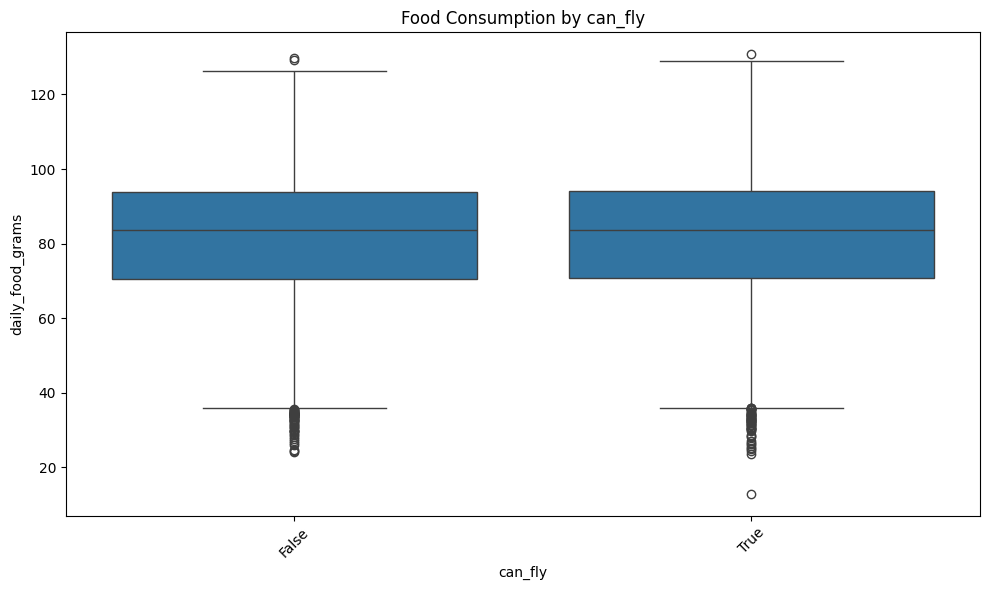


ANOVA for can_fly: F=1.2898, p=0.2561

Linear Regression with weight_kg:
Equation: daily_food_grams = 100.0002 + -0.7952 × weight_kg
R-squared: 0.6487
p-value: 0.0000


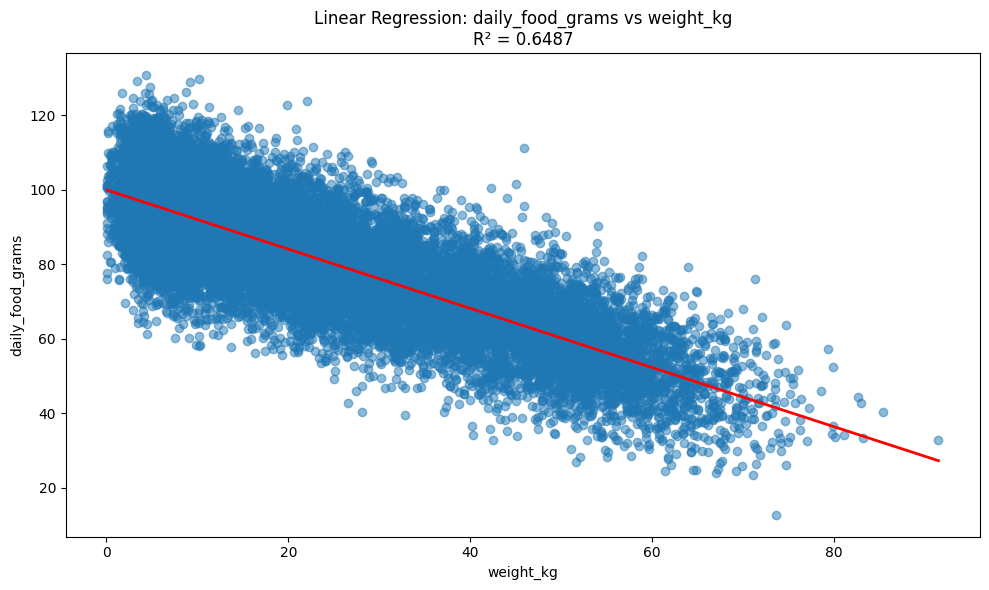

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame with animal data

# 1. Calculate correlation coefficients with daily_food_grams
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Ensure daily_food_grams is in the dataset and remove it from predictors
if 'daily_food_grams' not in numeric_cols:
    print("Error: 'daily_food_grams' column not found in the dataset")
else:
    # Calculate correlations
    food_correlations = df[numeric_cols].corr()['daily_food_grams'].drop('daily_food_grams')

    # Sort correlations by absolute value
    food_correlations = food_correlations.reindex(food_correlations.abs().sort_values(ascending=False).index)

    print("\nCorrelation Coefficients with daily_food_grams:")
    for col, corr in food_correlations.items():
        print(f"{col}: r = {corr:.4f}")

    # 2. Create a correlation heatmap for visual analysis
    plt.figure(figsize=(12, 10))
    correlation_cols = ['daily_food_grams'] + food_correlations.index.tolist()[:5]  # Top 5 correlations
    sns.heatmap(df[correlation_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap: Factors Predicting Food Consumption')
    plt.tight_layout()
    plt.show()

    # 3. Visualize top 3 correlations with scatter plots
    top_predictors = food_correlations.index.tolist()[:3]
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, predictor in enumerate(top_predictors):
        sns.regplot(x=predictor, y='daily_food_grams', data=df, ax=axes[i])
        axes[i].set_title(f'daily_food_grams vs {predictor}\nr = {food_correlations[predictor]:.4f}')

    plt.tight_layout()
    plt.show()

    # 4. Check categorical variables using boxplots
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    if categorical_cols:
        for col in categorical_cols[:3]:  # Limit to first 3 categorical variables
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=col, y='daily_food_grams', data=df)
            plt.title(f'Food Consumption by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # ANOVA test for categorical variables
            categories = df[col].unique()
            if len(categories) > 1:  # Ensure there are at least 2 categories
                anova_groups = [df[df[col] == cat]['daily_food_grams'].dropna() for cat in categories]
                f_val, p_val = stats.f_oneway(*anova_groups)
                print(f"\nANOVA for {col}: F={f_val:.4f}, p={p_val:.4f}")
                if p_val < 0.05:
                    print(f"Significant difference in food consumption based on {col} (p < 0.05)")

    # 5. Linear regression for the strongest predictor
    if len(top_predictors) > 0:
        top_predictor = top_predictors[0]
        x = df[top_predictor].values.reshape(-1, 1)
        y = df['daily_food_grams'].values

        # Remove NaN values
        mask = ~np.isnan(x.flatten()) & ~np.isnan(y)
        x = x[mask].reshape(-1, 1)
        y = y[mask]

        # Simple linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x.flatten(), y)

        print(f"\nLinear Regression with {top_predictor}:")
        print(f"Equation: daily_food_grams = {intercept:.4f} + {slope:.4f} × {top_predictor}")
        print(f"R-squared: {r_value**2:.4f}")
        print(f"p-value: {p_value:.4f}")

        # Create prediction line
        x_line = np.array([min(x), max(x)])
        y_line = intercept + slope * x_line

        # Plot regression line
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, alpha=0.5)
        plt.plot(x_line, y_line, color='red', linewidth=2)
        plt.xlabel(top_predictor)
        plt.ylabel('daily_food_grams')
        plt.title(f'Linear Regression: daily_food_grams vs {top_predictor}\nR² = {r_value**2:.4f}')
        plt.tight_layout()
        plt.show()

## Is there a relationship between age and number of friends?

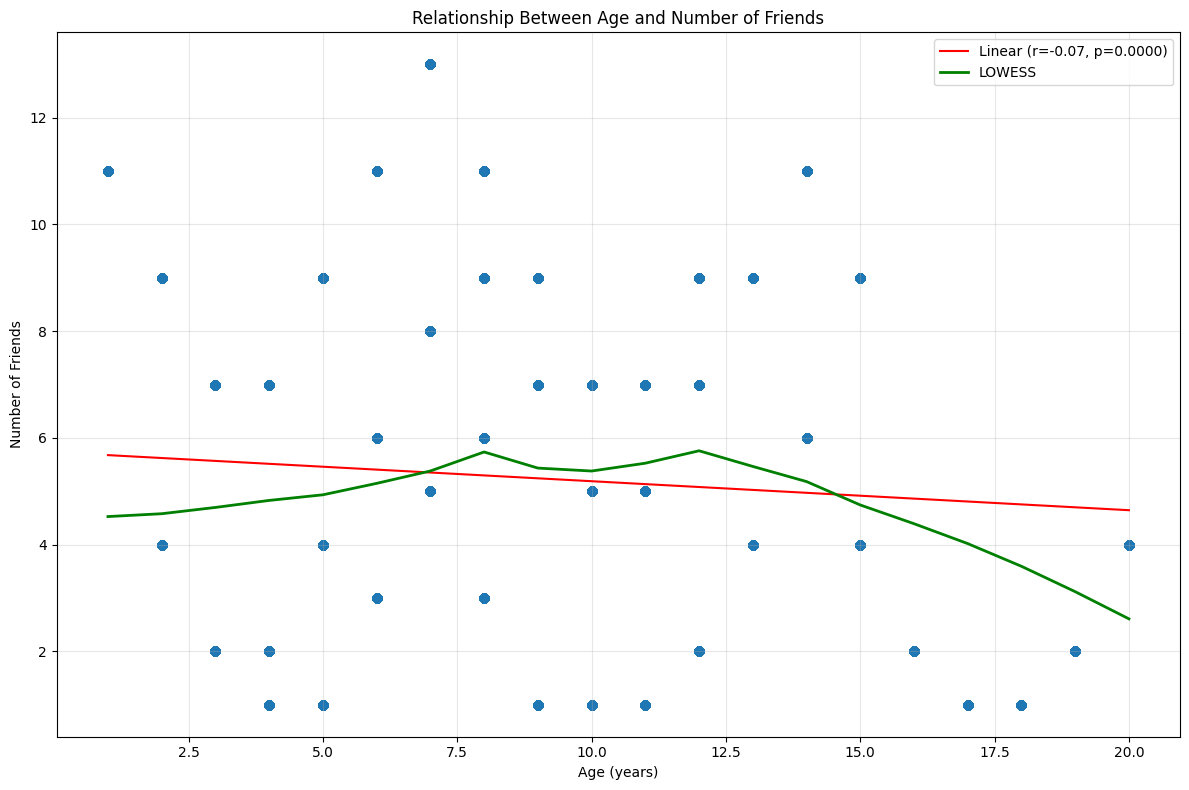

Spearman rank correlation: rho = -0.0289, p = 0.0000
Pearson correlation: r = -0.0734, p = 0.0000

Polynomial Regression Models:
Degree 1 polynomial: R² = 0.0054
Degree 2 polynomial: R² = 0.0275
Degree 3 polynomial: R² = 0.0621
Degree 4 polynomial: R² = 0.0898


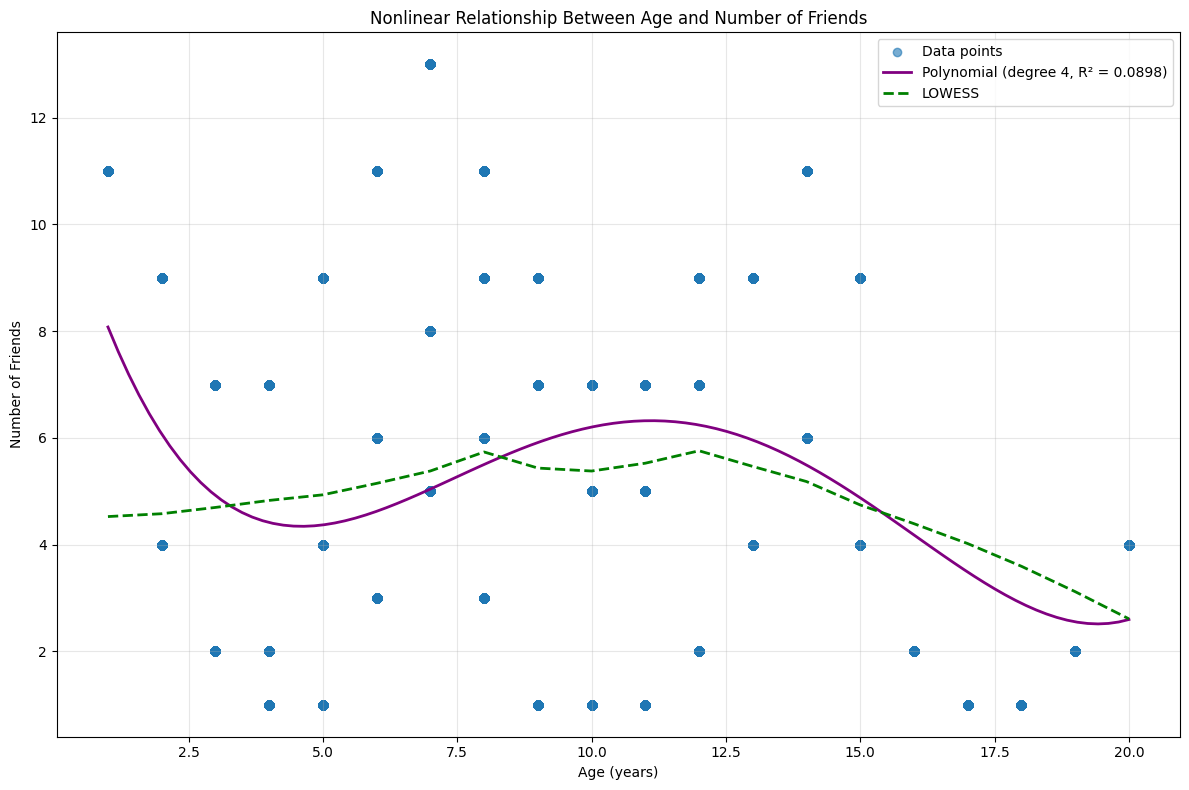


Analyzing relationship by age groups:
               mean  median  count
age_group                         
0-5        4.355573     4.0   5141
6-10       5.797450     6.0   8077
11-15      6.457637     7.0   4969
16-20      1.976834     2.0   1813
20+             NaN     NaN      0


<ipython-input-17-9fbe51377c6f>:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('age_group')['number_of_friends'].agg(['mean', 'median', 'count'])


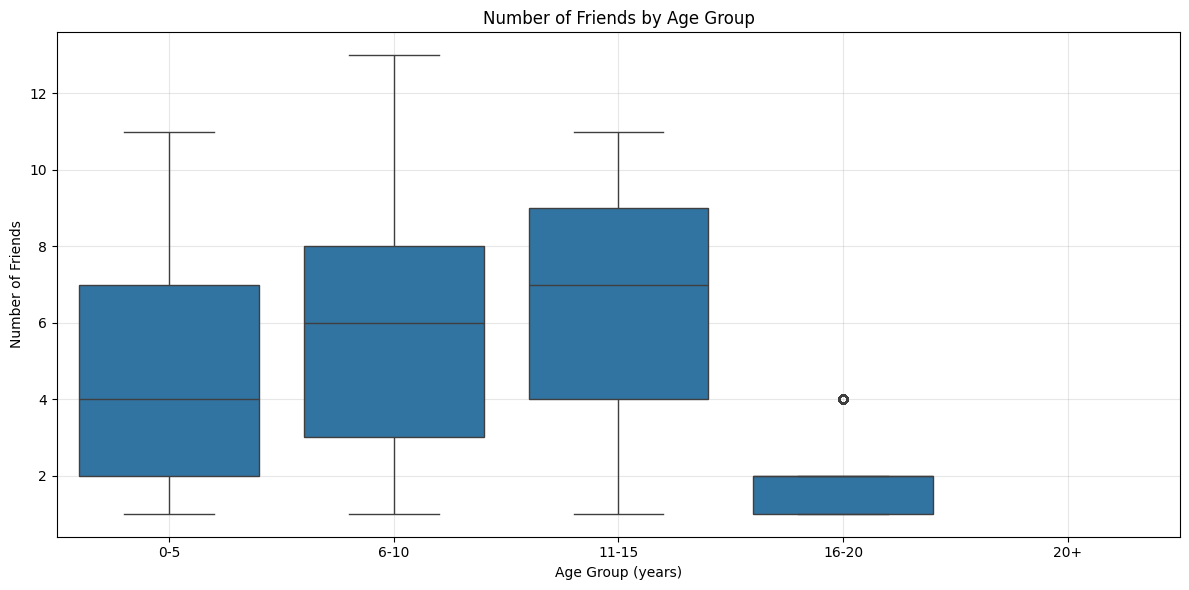


Mutual Information Score: 1.3735
Higher MI scores indicate stronger relationships, linear or nonlinear


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df is your DataFrame with animal data

# First, check if the required columns exist
if 'age_years' not in df.columns or 'number_of_friends' not in df.columns:
    print("Error: Required columns 'age_years' and/or 'number_of_friends' not found")
else:
    # 1. Create a scatter plot with both linear and LOWESS trendlines
    plt.figure(figsize=(12, 8))

    # Basic scatter plot
    plt.scatter(df['age_years'], df['number_of_friends'], alpha=0.6)

    # Add linear trendline
    x = df['age_years']
    y = df['number_of_friends']
    mask = ~np.isnan(x) & ~np.isnan(y)  # Remove NaN values

    if sum(mask) > 1:  # Ensure we have at least 2 valid points for regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
        x_line = np.array([min(x[mask]), max(x[mask])])
        y_line = intercept + slope * x_line
        plt.plot(x_line, y_line, color='red', label=f'Linear (r={r_value:.2f}, p={p_value:.4f})')

        # Add LOWESS smoothing (to capture nonlinear patterns)
        lowess = sns.regplot(x=x, y=y, lowess=True, scatter=False,
                           line_kws={'color': 'green', 'linewidth': 2}, label='LOWESS')

        plt.xlabel('Age (years)')
        plt.ylabel('Number of Friends')
        plt.title('Relationship Between Age and Number of Friends')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 2. Calculate Spearman rank correlation (better for nonlinear relationships)
        spearman_corr, spearman_p = stats.spearmanr(x[mask], y[mask])
        print(f"Spearman rank correlation: rho = {spearman_corr:.4f}, p = {spearman_p:.4f}")

        # 3. Calculate Pearson correlation for comparison
        pearson_corr, pearson_p = stats.pearsonr(x[mask], y[mask])
        print(f"Pearson correlation: r = {pearson_corr:.4f}, p = {pearson_p:.4f}")

        # 4. Try polynomial regression models
        print("\nPolynomial Regression Models:")

        X = x[mask].values.reshape(-1, 1)
        Y = y[mask].values

        best_degree = 1
        best_r2 = 0

        # Try polynomials of degree 1-4 to find best fit
        for degree in range(1, 5):
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X)

            model = LinearRegression()
            model.fit(X_poly, Y)
            y_pred = model.predict(X_poly)

            r2 = r2_score(Y, y_pred)
            print(f"Degree {degree} polynomial: R² = {r2:.4f}")

            if r2 > best_r2:
                best_r2 = r2
                best_degree = degree

        # 5. Visualize the best polynomial fit
        plt.figure(figsize=(12, 8))
        plt.scatter(x[mask], y[mask], alpha=0.6, label='Data points')

        # Plot the best polynomial fit
        poly = PolynomialFeatures(degree=best_degree)
        X_range = np.linspace(min(x[mask]), max(x[mask]), 100).reshape(-1, 1)
        X_poly = poly.fit_transform(X)
        X_range_poly = poly.transform(X_range)

        model = LinearRegression()
        model.fit(X_poly, Y)
        y_range_pred = model.predict(X_range_poly)

        plt.plot(X_range, y_range_pred, color='purple', linewidth=2,
                 label=f'Polynomial (degree {best_degree}, R² = {best_r2:.4f})')

        # Also show LOWESS for comparison
        sns.regplot(x=x, y=y, lowess=True, scatter=False,
                   line_kws={'color': 'green', 'linewidth': 2, 'linestyle': '--'},
                   label='LOWESS')

        plt.xlabel('Age (years)')
        plt.ylabel('Number of Friends')
        plt.title('Nonlinear Relationship Between Age and Number of Friends')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 6. Check for age groups with different patterns
        print("\nAnalyzing relationship by age groups:")

        # Create age groups
        bins = [0, 5, 10, 15, 20, np.inf]
        labels = ['0-5', '6-10', '11-15', '16-20', '20+']
        df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels)

        # Calculate statistics by age group
        group_stats = df.groupby('age_group')['number_of_friends'].agg(['mean', 'median', 'count'])
        print(group_stats)

        # Visualize age groups
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='age_group', y='number_of_friends', data=df)
        plt.title('Number of Friends by Age Group')
        plt.xlabel('Age Group (years)')
        plt.ylabel('Number of Friends')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 7. Additional nonparametric check - Mutual Information Score
        # This captures more general dependencies beyond just linear or monotonic
        try:
            from sklearn.feature_selection import mutual_info_regression
            mi_score = mutual_info_regression(X, Y, discrete_features=False)[0]
            print(f"\nMutual Information Score: {mi_score:.4f}")
            print("Higher MI scores indicate stronger relationships, linear or nonlinear")
        except:
            print("\nCould not calculate Mutual Information Score")
    else:
        print("Not enough valid data points for analysis")

## What percentage of animals can fly?

Total number of animals: 20000
Number of animals that can fly: 9970
Percentage of animals that can fly: 49.85%


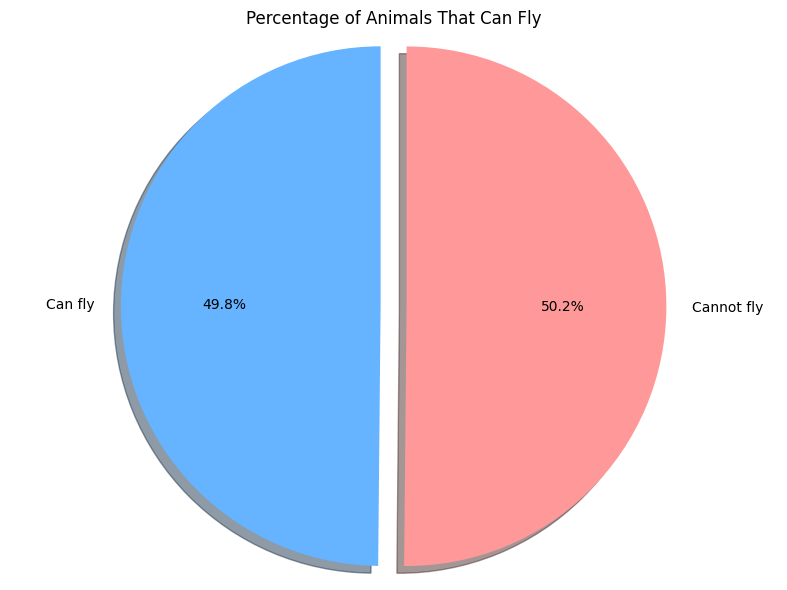

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with animal data
# Make sure the 'can_fly' field is boolean (True/False)

# Count flying animals
can_fly_count = df['can_fly'].sum()  # Sum of True values
total_animals = len(df)
fly_percentage = (can_fly_count / total_animals) * 100

# Print the result
print(f"Total number of animals: {total_animals}")
print(f"Number of animals that can fly: {can_fly_count}")
print(f"Percentage of animals that can fly: {fly_percentage:.2f}%")

# Optional: Create a pie chart visualization
plt.figure(figsize=(8, 6))
labels = ['Can fly', 'Cannot fly']
sizes = [can_fly_count, total_animals - can_fly_count]
explode = (0.1, 0)  # Explode the 'Can fly' slice
colors = ['#66b3ff', '#ff9999']

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.title('Percentage of Animals That Can Fly')
plt.tight_layout()
plt.show()

## Which animal types are most likely to swim?

Swimming likelihood by animal type (sorted by percentage):
             swim_percentage  count
animal_type                        
cat                   90.775   4000
bird                  88.925   4000
turtle                10.550   4000
dog                    9.825   4000
fish                   9.775   4000

Top 5 animal types most likely to swim:
             swim_percentage  count
animal_type                        
cat                   90.775   4000
bird                  88.925   4000
turtle                10.550   4000
dog                    9.825   4000
fish                   9.775   4000


<ipython-input-19-59cae2509ed6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='swim_percentage', y=plot_data.index, data=plot_data,


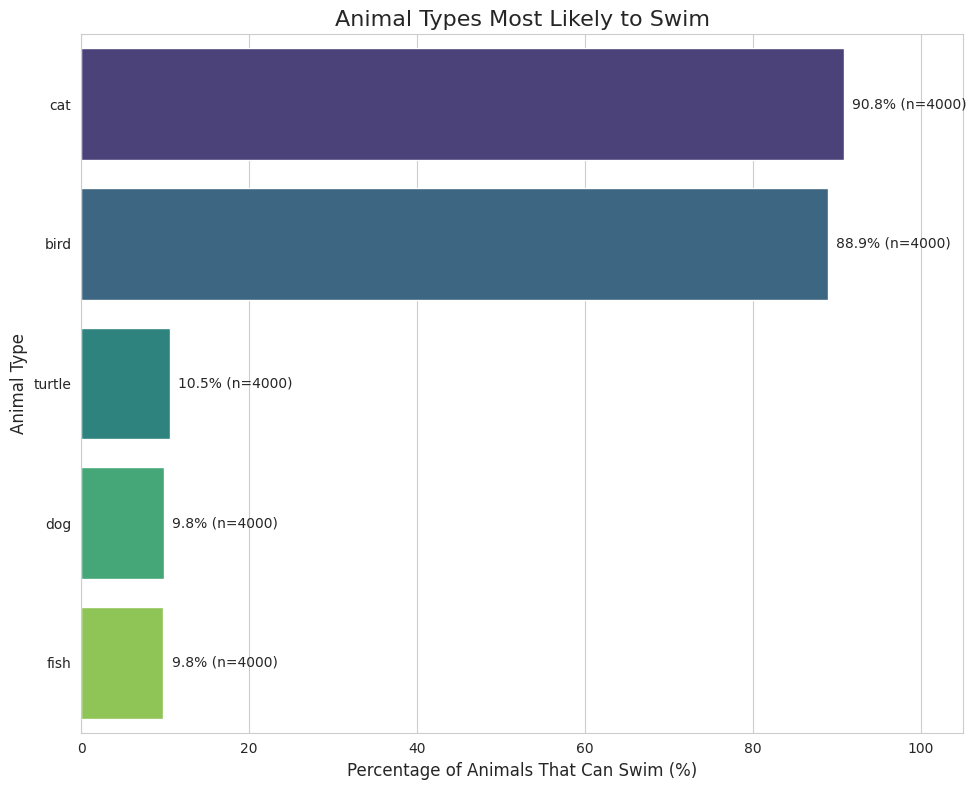


Detailed analysis of swimming likelihood by animal type:
             can_swim_pct  sample_size  confidence_interval
animal_type                                                
cat                90.775         4000             0.008972
bird               88.925         4000             0.009728
turtle             10.550         4000             0.009523
dog                 9.825         4000             0.009228
fish                9.775         4000             0.009207


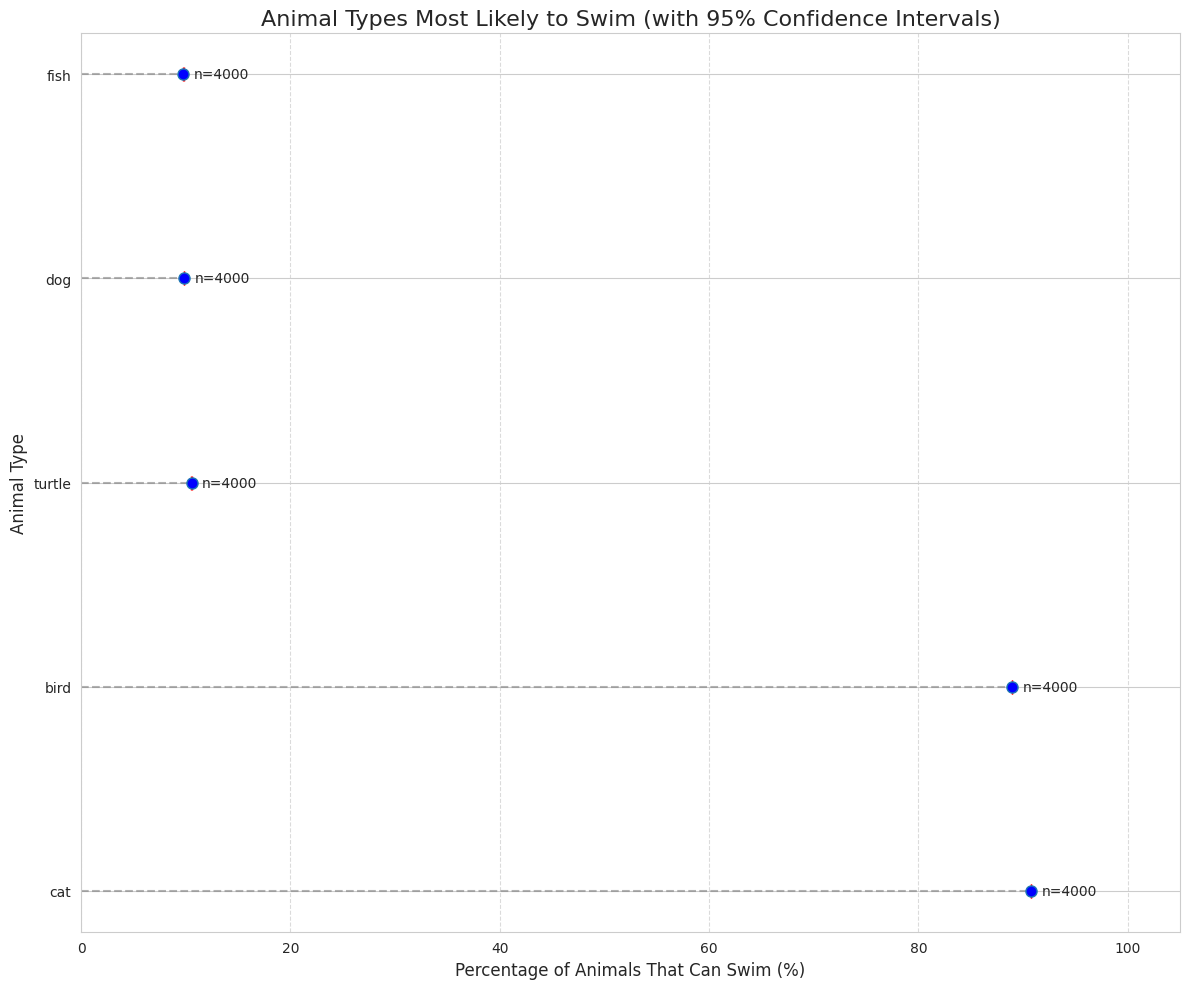

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Group by animal_type and calculate the percentage of animals that can swim in each group
swimming_likelihood = df.groupby('animal_type')['can_swim'].agg(['mean', 'count'])
swimming_likelihood['mean'] = swimming_likelihood['mean'] * 100  # Convert to percentage
swimming_likelihood = swimming_likelihood.rename(columns={'mean': 'swim_percentage'})

# Sort by swimming percentage (descending) to see which types are most likely to swim
swimming_likelihood = swimming_likelihood.sort_values('swim_percentage', ascending=False)

# Filter to include only animal types with a minimum sample size (optional)
min_sample_size = 3  # Adjust this value as needed
filtered_swimming_likelihood = swimming_likelihood[swimming_likelihood['count'] >= min_sample_size]

# Print the results
print("Swimming likelihood by animal type (sorted by percentage):")
print(filtered_swimming_likelihood)

# Print the top 5 animal types most likely to swim
print("\nTop 5 animal types most likely to swim:")
print(filtered_swimming_likelihood.head(5))

# Create a horizontal bar chart to visualize the results
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Plot with all data or just the top N animal types
top_n = 10  # Adjust this to show more or fewer animal types
plot_data = filtered_swimming_likelihood.head(top_n) if len(filtered_swimming_likelihood) > top_n else filtered_swimming_likelihood

# Create the horizontal bar chart
ax = sns.barplot(x='swim_percentage', y=plot_data.index, data=plot_data,
                 palette='viridis', orient='h')

# Add percentage labels to the bars
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height()/2,
             f'{width:.1f}% (n={plot_data["count"].iloc[i]})',
             ha='left', va='center')

# Add titles and labels
plt.title('Animal Types Most Likely to Swim', fontsize=16)
plt.xlabel('Percentage of Animals That Can Swim (%)', fontsize=12)
plt.ylabel('Animal Type', fontsize=12)
plt.xlim(0, 105)  # Set x-axis limit to allow space for percentage labels

plt.tight_layout()
plt.show()

# Optional: Create a more detailed analysis including confidence intervals
import numpy as np

def confidence_interval(series):
    """Calculate 95% confidence interval for a series of boolean values"""
    n = len(series)
    if n <= 1:
        return 0
    p = series.mean()
    # Wilson score interval for small samples
    z = 1.96  # 95% confidence
    denominator = 1 + z**2/n
    centre_adjusted_probability = (p + z**2/(2*n))/denominator
    adjusted_standard_error = z * np.sqrt((p*(1-p) + z**2/(4*n))/n)/denominator
    lower_bound = centre_adjusted_probability - adjusted_standard_error
    upper_bound = centre_adjusted_probability + adjusted_standard_error
    return (upper_bound - lower_bound) / 2

# Group by animal_type and create a more detailed analysis
detailed_analysis = df.groupby('animal_type').agg(
    can_swim_pct=('can_swim', lambda x: x.mean() * 100),
    sample_size=('can_swim', 'count'),
    confidence_interval=('can_swim', confidence_interval)
).sort_values('can_swim_pct', ascending=False)

# Print the detailed analysis
print("\nDetailed analysis of swimming likelihood by animal type:")
print(detailed_analysis)

# Plot with confidence intervals
plt.figure(figsize=(12, 10))
top_n_detailed = detailed_analysis.head(top_n) if len(detailed_analysis) > top_n else detailed_analysis

plt.errorbar(
    x=top_n_detailed['can_swim_pct'],
    y=top_n_detailed.index,
    xerr=top_n_detailed['confidence_interval'],
    fmt='o',
    capsize=5,
    ecolor='red',
    markerfacecolor='blue',
    markersize=8
)

# Connect points to y-axis with horizontal lines
for i, animal in enumerate(top_n_detailed.index):
    plt.hlines(y=i, xmin=0, xmax=top_n_detailed.loc[animal, 'can_swim_pct'],
               colors='gray', linestyles='dashed', alpha=0.6)

# Add labels with sample sizes
for i, animal in enumerate(top_n_detailed.index):
    plt.text(
        top_n_detailed.loc[animal, 'can_swim_pct'] + top_n_detailed.loc[animal, 'confidence_interval'] + 1,
        i,
        f"n={top_n_detailed.loc[animal, 'sample_size']}",
        va='center'
    )

plt.title('Animal Types Most Likely to Swim (with 95% Confidence Intervals)', fontsize=16)
plt.xlabel('Percentage of Animals That Can Swim (%)', fontsize=12)
plt.ylabel('Animal Type', fontsize=12)
plt.xlim(0, 105)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## How does an animal's age affect its ability to run?

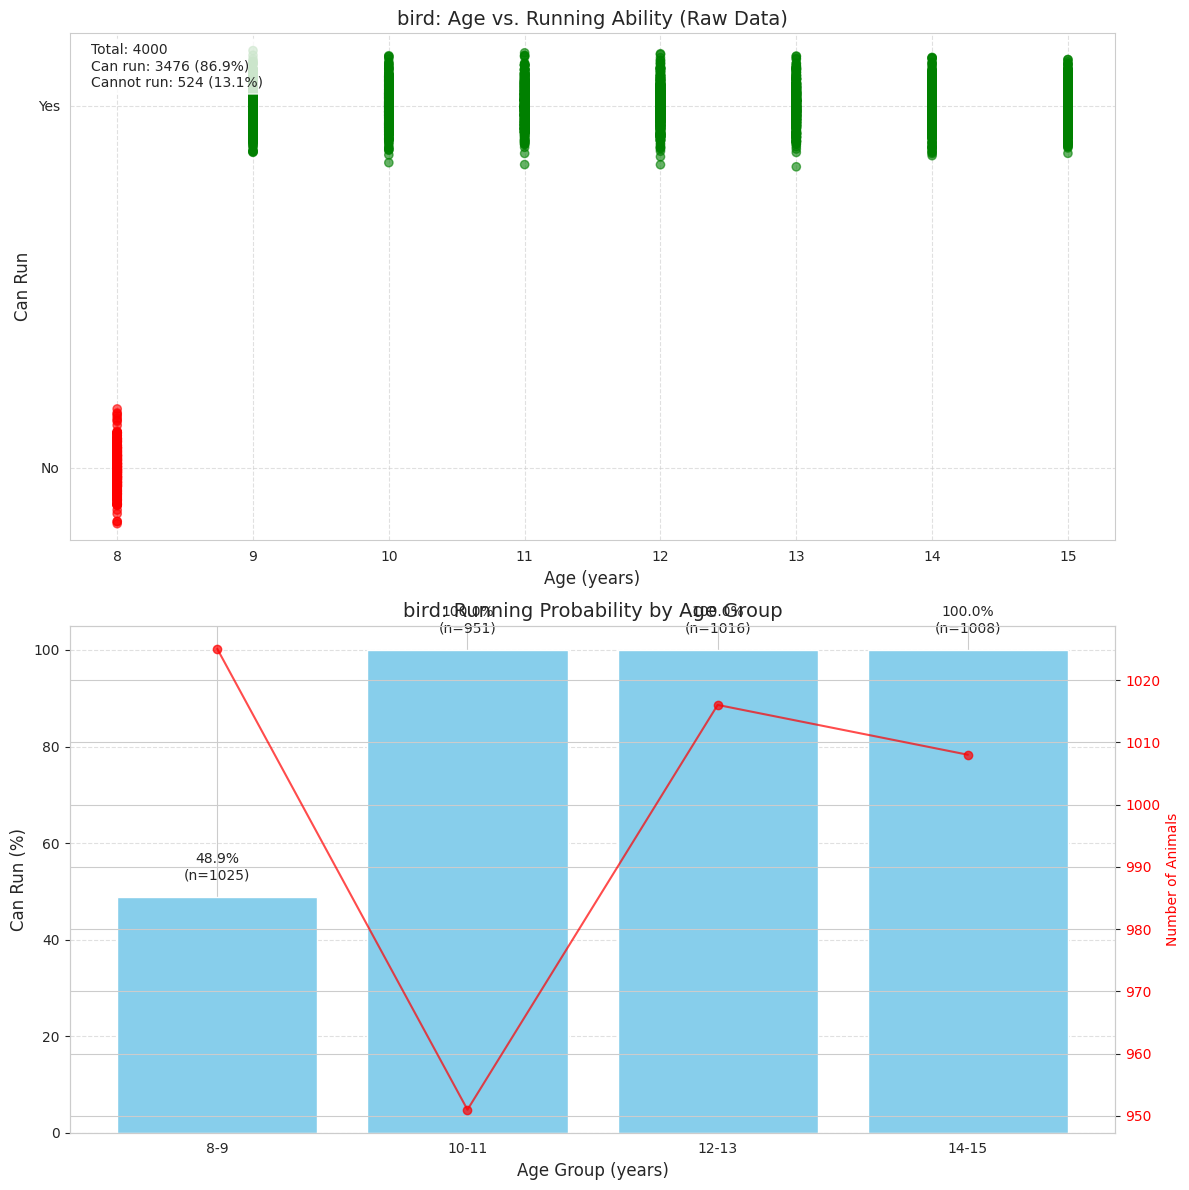


bird - Running Ability by Age Group:
Age 8-9: 48.9% can run (n=1025)
Age 10-11: 100.0% can run (n=951)
Age 12-13: 100.0% can run (n=1016)
Age 14-15: 100.0% can run (n=1008)


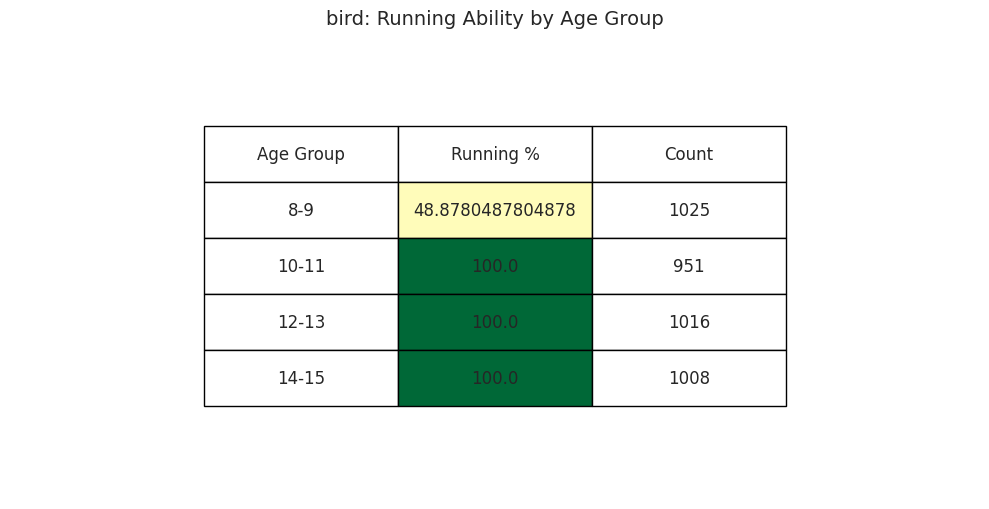

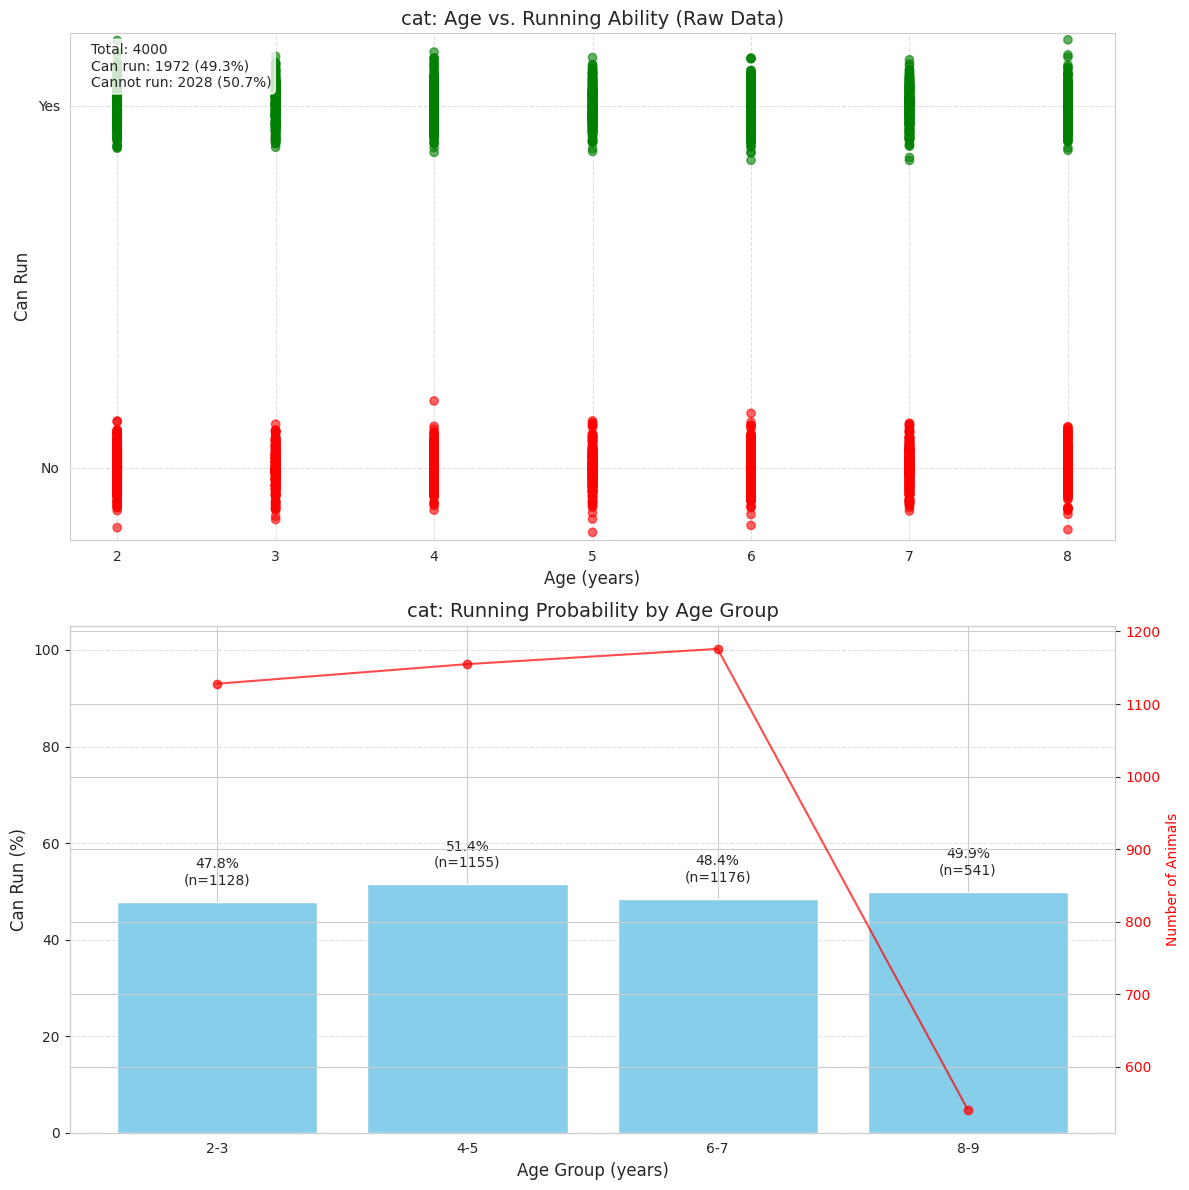


cat - Running Ability by Age Group:
Age 2-3: 47.8% can run (n=1128)
Age 4-5: 51.4% can run (n=1155)
Age 6-7: 48.4% can run (n=1176)
Age 8-9: 49.9% can run (n=541)


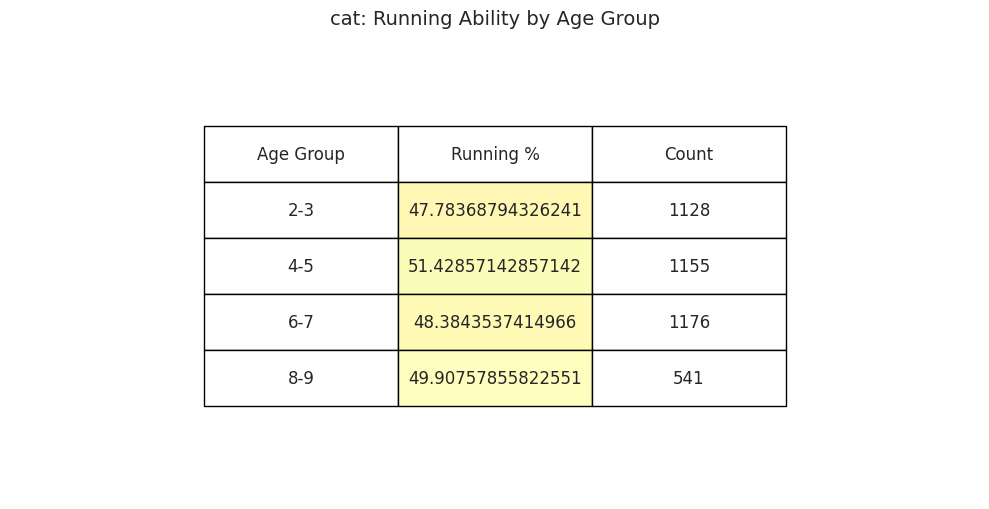

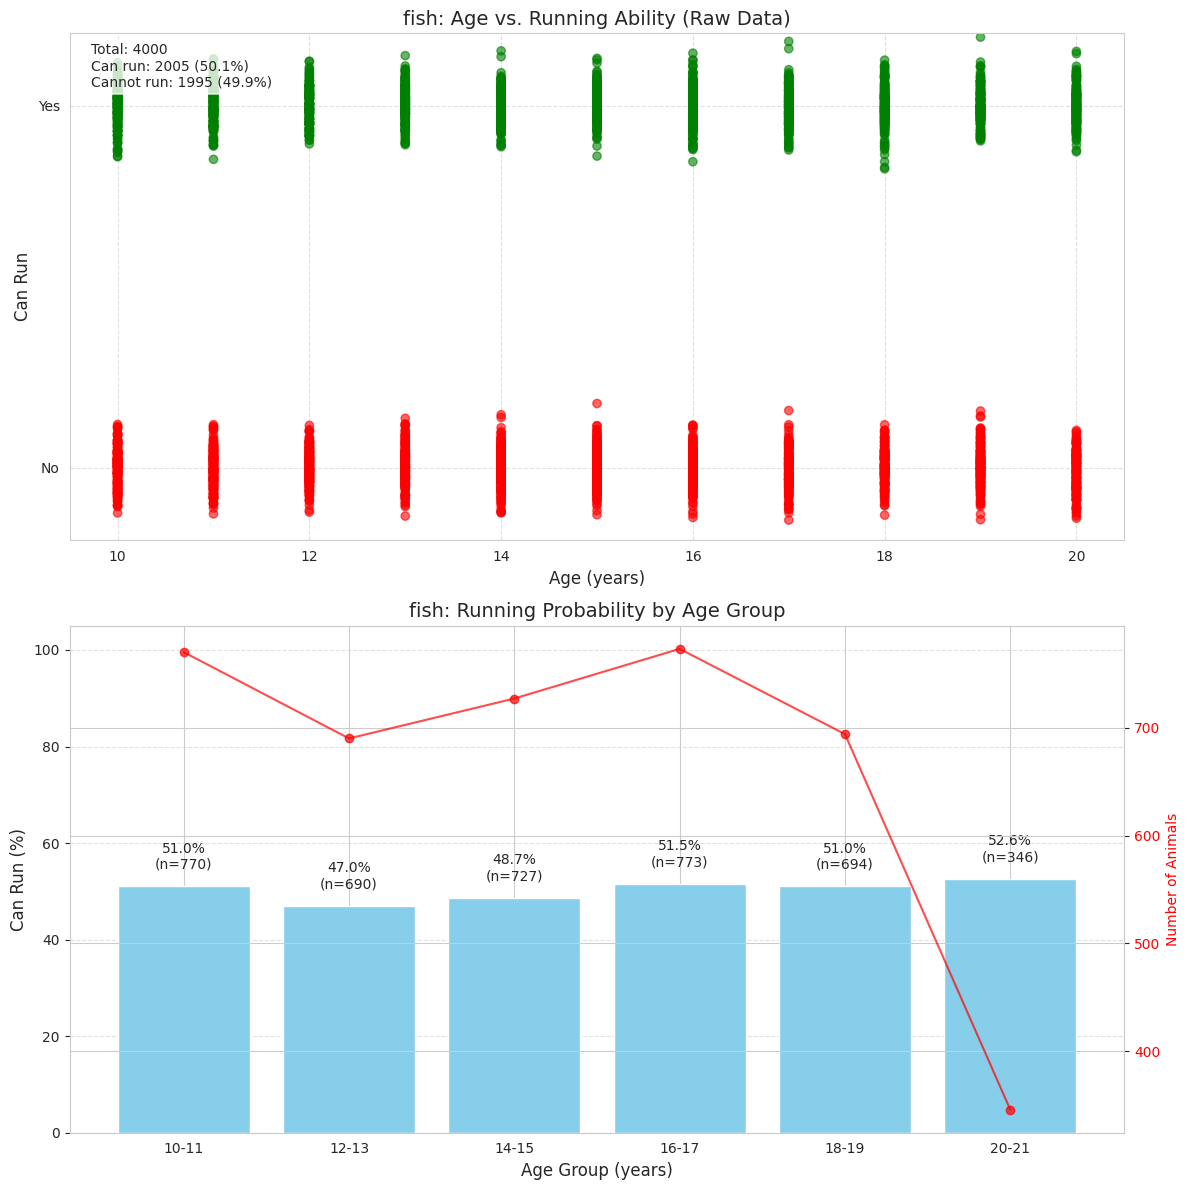


fish - Running Ability by Age Group:
Age 10-11: 51.0% can run (n=770)
Age 12-13: 47.0% can run (n=690)
Age 14-15: 48.7% can run (n=727)
Age 16-17: 51.5% can run (n=773)
Age 18-19: 51.0% can run (n=694)
Age 20-21: 52.6% can run (n=346)


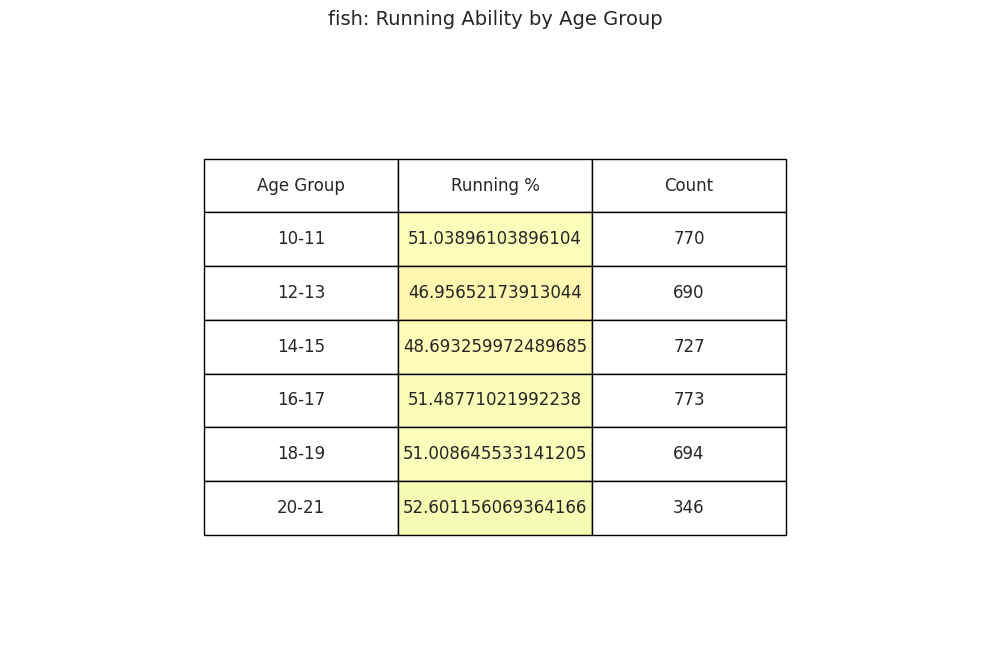

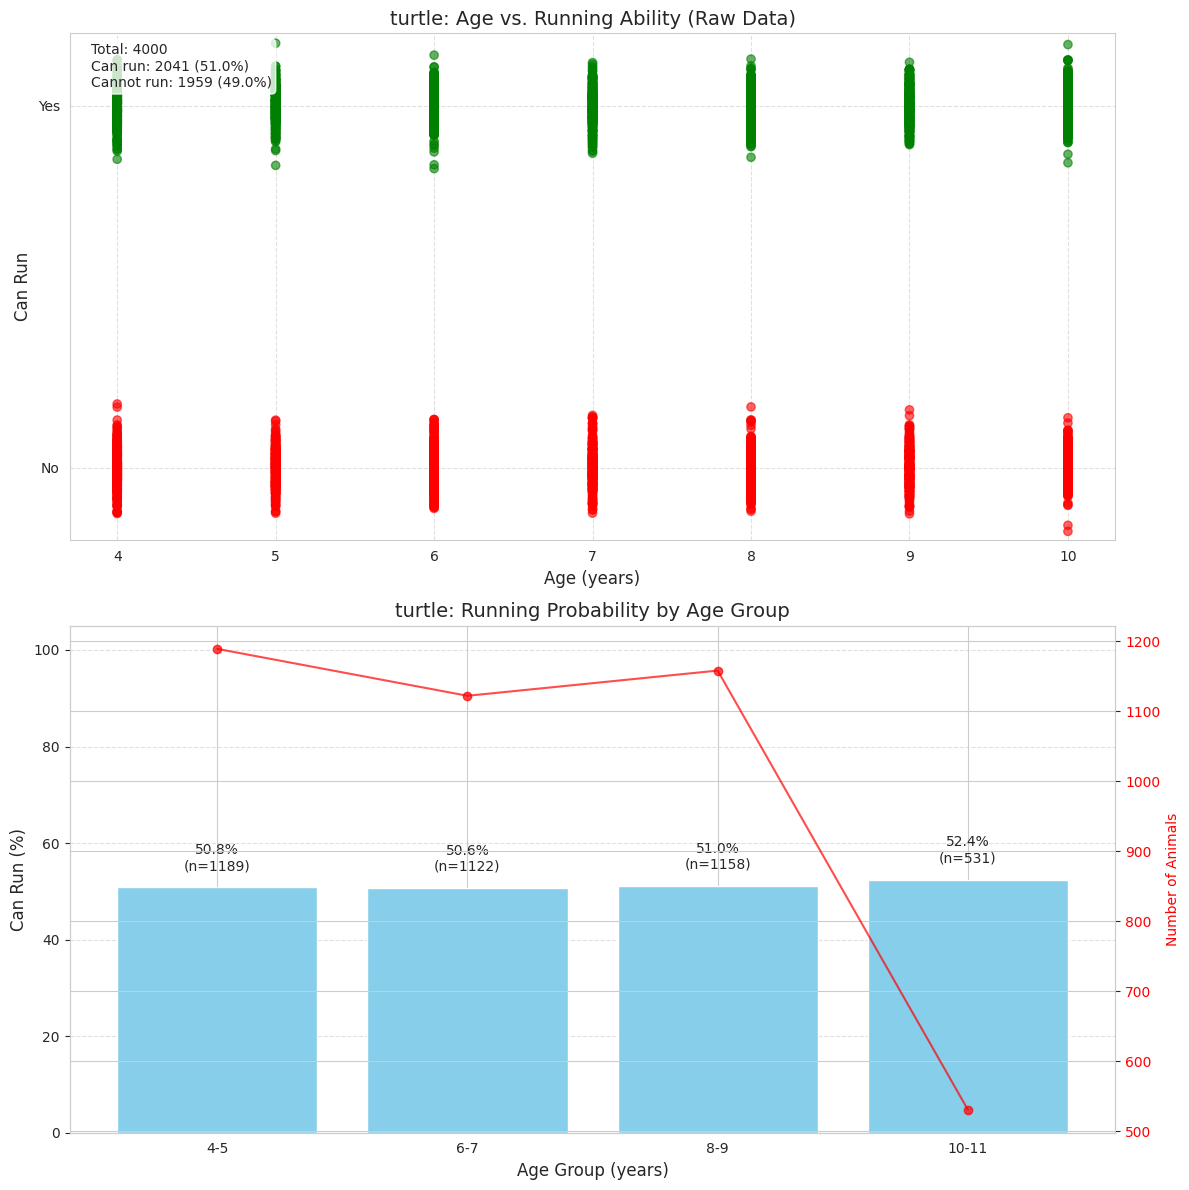


turtle - Running Ability by Age Group:
Age 4-5: 50.8% can run (n=1189)
Age 6-7: 50.6% can run (n=1122)
Age 8-9: 51.0% can run (n=1158)
Age 10-11: 52.4% can run (n=531)


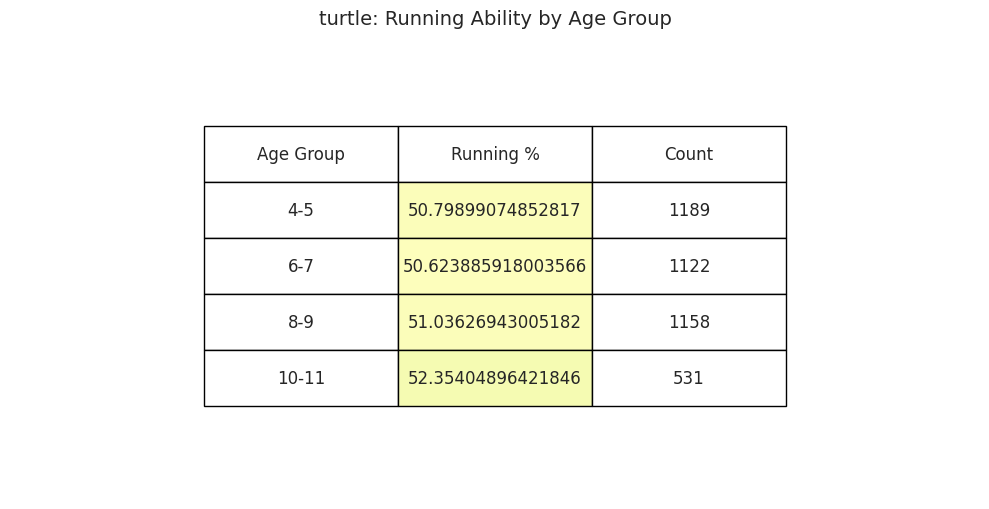

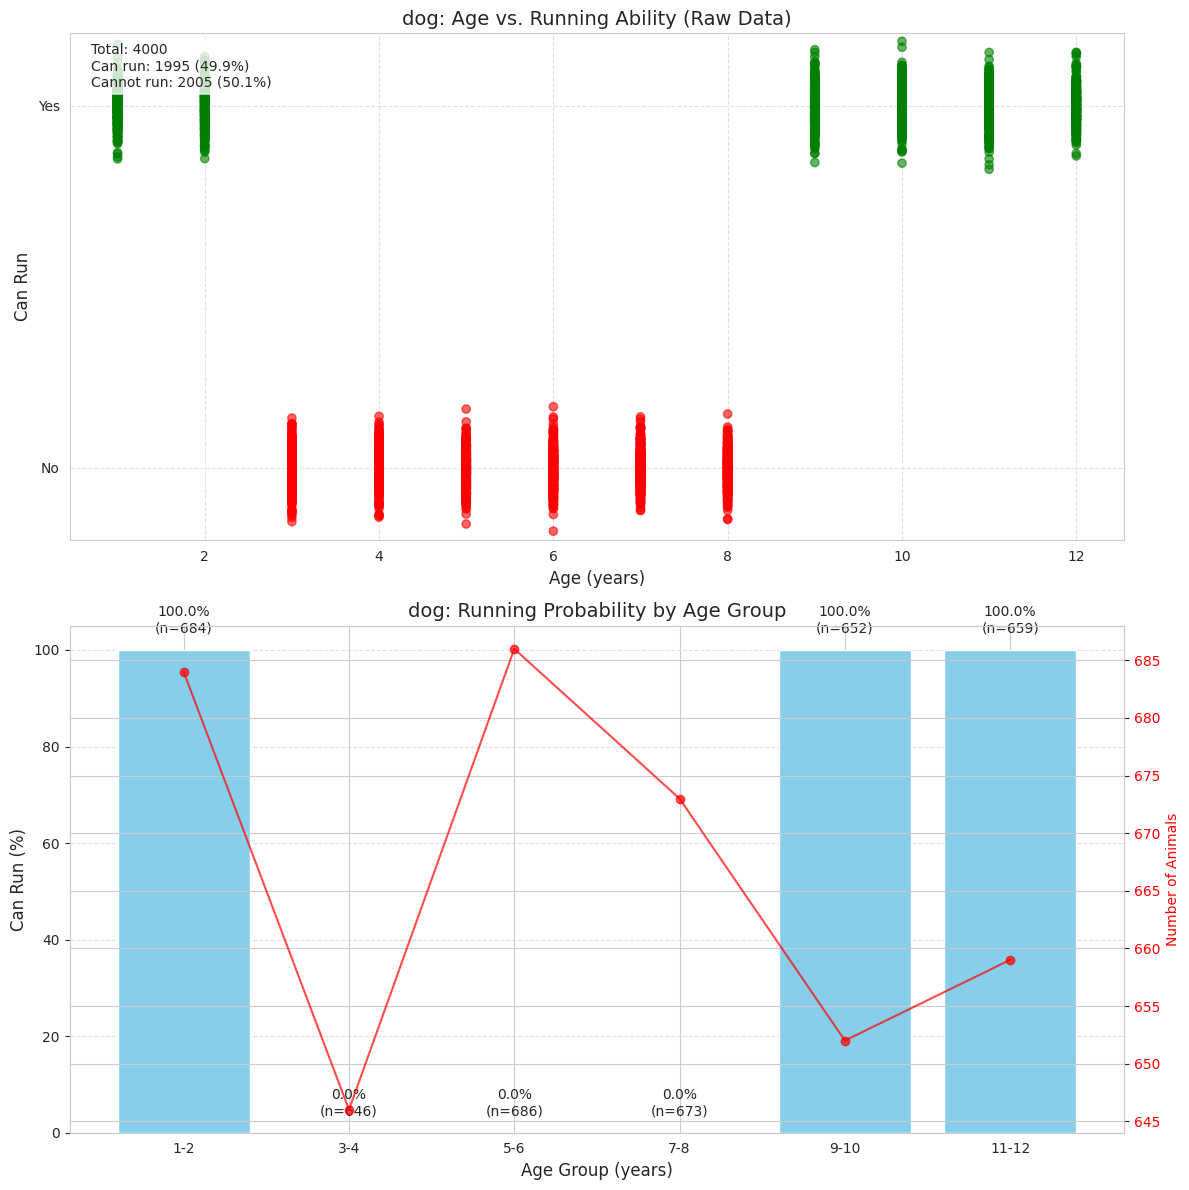


dog - Running Ability by Age Group:
Age 1-2: 100.0% can run (n=684)
Age 3-4: 0.0% can run (n=646)
Age 5-6: 0.0% can run (n=686)
Age 7-8: 0.0% can run (n=673)
Age 9-10: 100.0% can run (n=652)
Age 11-12: 100.0% can run (n=659)


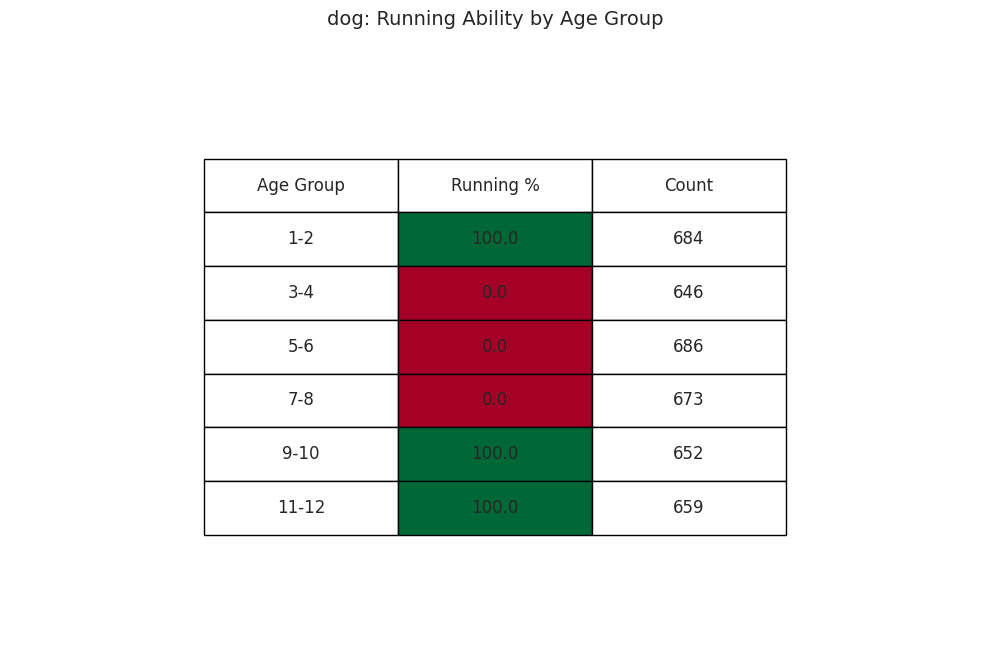

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Assuming df is your DataFrame with animal data

# Ensure 'can_run' is treated as boolean
if df['can_run'].dtype != bool:
    df['can_run'] = df['can_run'].astype(bool)

# Get unique animal types
animal_types = df['animal_type'].unique()

# Create detailed plots for each animal type - avoid using pd.cut completely
for animal_type in animal_types:
    subset = df[df['animal_type'] == animal_type]

    # Create a figure with 2 subplots - scatter and trend analysis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # 1. Scatter plot with jitter
    jittered = subset.copy()
    jittered['can_run_jittered'] = jittered['can_run'].astype(int) + np.random.normal(0, 0.05, size=len(jittered))

    ax1.scatter(jittered['age_years'], jittered['can_run_jittered'],
               alpha=0.6, c=jittered['can_run'].map({True: 'green', False: 'red'}))

    ax1.set_title(f'{animal_type}: Age vs. Running Ability (Raw Data)', fontsize=14)
    ax1.set_xlabel('Age (years)', fontsize=12)
    ax1.set_ylabel('Can Run', fontsize=12)

    # Set y-axis to show only 0 and 1
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels(['No', 'Yes'])
    ax1.set_ylim(-0.2, 1.2)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Add count information
    total = len(subset)
    runners = sum(subset['can_run'])
    non_runners = total - runners
    info_text = f"Total: {total}\nCan run: {runners} ({runners/total*100:.1f}%)\nCannot run: {non_runners} ({non_runners/total*100:.1f}%)"
    ax1.text(0.02, 0.98, info_text, transform=ax1.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # 2. Manual age binning and running probability analysis
    # Determine appropriate age bins based on data range
    min_age = int(subset['age_years'].min())
    max_age = int(subset['age_years'].max())

    # Ensure at least 2 years per bin, adjust based on age range
    bin_width = max(2, (max_age - min_age) // 5)  # Aim for about 5 bins total

    # Manually create age groups without pd.cut
    running_probs = []
    age_ranges = []
    animal_counts = []

    for age_start in range(min_age, max_age + bin_width, bin_width):
        age_end = age_start + bin_width - 1
        age_group = subset[(subset['age_years'] >= age_start) & (subset['age_years'] <= age_end)]

        if len(age_group) > 0:  # Only include if there are animals in this age range
            prob = age_group['can_run'].mean() * 100
            running_probs.append(prob)
            age_ranges.append(f"{age_start}-{age_end}")
            animal_counts.append(len(age_group))

    # Create the trend plot
    bars = ax2.bar(range(len(age_ranges)), running_probs, color='skyblue')
    ax2.set_title(f'{animal_type}: Running Probability by Age Group', fontsize=14)
    ax2.set_xlabel('Age Group (years)', fontsize=12)
    ax2.set_ylabel('Can Run (%)', fontsize=12)
    ax2.set_xticks(range(len(age_ranges)))
    ax2.set_xticklabels(age_ranges)
    ax2.set_ylim(0, 105)
    ax2.grid(True, linestyle='--', alpha=0.6, axis='y')

    # Add value labels and counts on top of bars
    for i, (bar, count) in enumerate(zip(bars, animal_counts)):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 3,
                f'{height:.1f}%\n(n={count})',
                ha='center', va='bottom', fontsize=10)

    # Add secondary axis showing sample size
    ax3 = ax2.twinx()
    ax3.plot(range(len(age_ranges)), animal_counts, 'ro-', alpha=0.7)
    ax3.set_ylabel('Number of Animals', color='r')
    ax3.tick_params(axis='y', labelcolor='r')

    plt.tight_layout()
    plt.show()

    # Print a summary table
    print(f"\n{animal_type} - Running Ability by Age Group:")
    for i, age_range in enumerate(age_ranges):
        print(f"Age {age_range}: {running_probs[i]:.1f}% can run (n={animal_counts[i]})")

    # Bonus: Create a heatmap-style table visualization
    if len(age_ranges) >= 2:
        data = {'Age Group': age_ranges,
                'Running %': running_probs,
                'Count': animal_counts}
        summary_df = pd.DataFrame(data)

        plt.figure(figsize=(10, len(age_ranges) * 0.8 + 2))

        # Create the table visualization
        table = plt.table(cellText=summary_df.values,
                         colLabels=summary_df.columns,
                         cellLoc='center',
                         loc='center',
                         bbox=[0.2, 0.2, 0.6, 0.6])

        # Customize table appearance
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 1.8)

        # Color code the running percentage cells
        for i in range(len(age_ranges)):
            table[(i+1, 1)].set_facecolor(plt.cm.RdYlGn(running_probs[i]/100))

        plt.title(f'{animal_type}: Running Ability by Age Group', fontsize=14)
        plt.axis('off')  # Hide axes
        plt.tight_layout()
        plt.show()

## What percentage of animals watch YouTube?

Overall, 42.46% of animals watch YouTube.

Detailed breakdown:
                 Count  Percentage
watches_youtube                   
False            11508       57.54
True              8492       42.46


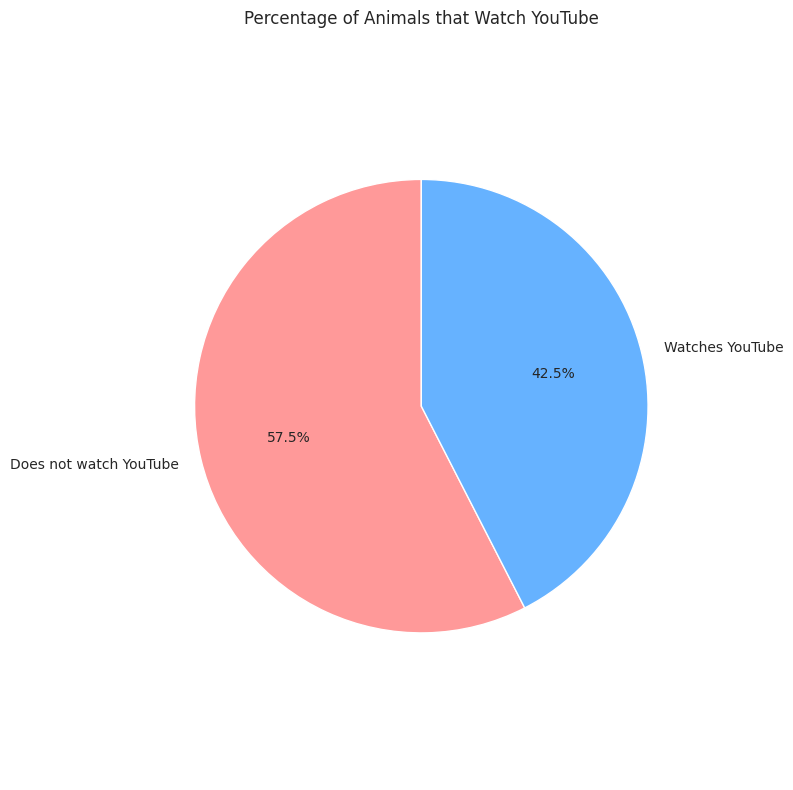


Percentage of animals watching YouTube by animal type:
fish: 90.25%
turtle: 90.20%
dog: 10.70%
cat: 10.65%
bird: 10.50%


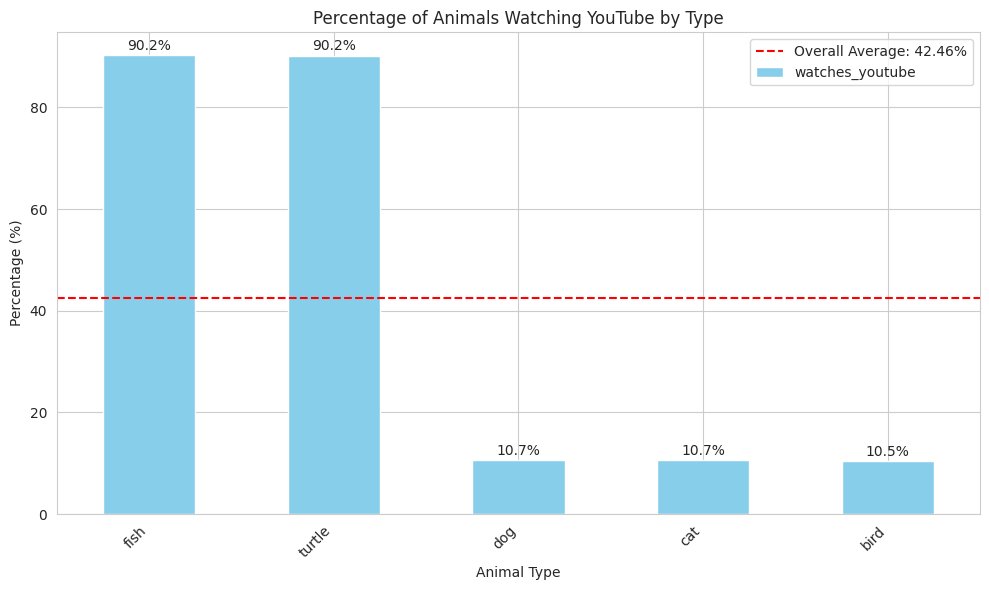


Correlation of other factors with watching YouTube:
Correlation with weight_kg: 0.4483
Correlation with height_cm: -0.4358
Correlation with age_years: 0.2772
Correlation with number_of_friends: -0.5587
Correlation with daily_food_grams: -0.3641
Correlation with popularity_score: -0.0533


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Calculate the overall percentage
youtube_percentage = df['watches_youtube'].mean() * 100

# Print the overall result
print(f"Overall, {youtube_percentage:.2f}% of animals watch YouTube.")

# Get count and percentage for better context
youtube_counts = df['watches_youtube'].value_counts()
youtube_percent = df['watches_youtube'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame for display
youtube_stats = pd.DataFrame({
    'Count': youtube_counts,
    'Percentage': youtube_percent
})

print("\nDetailed breakdown:")
print(youtube_stats)

# Create a pie chart to visualize
plt.figure(figsize=(8, 8))
plt.pie(youtube_stats['Percentage'],
        labels=['Does not watch YouTube', 'Watches YouTube'] if False in youtube_stats.index else ['Watches YouTube', 'Does not watch YouTube'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF9999', '#66B2FF'] if False in youtube_stats.index else ['#66B2FF', '#FF9999'])
plt.title('Percentage of Animals that Watch YouTube')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Optional: Break down by animal_type
by_type = df.groupby('animal_type')['watches_youtube'].mean() * 100
by_type = by_type.sort_values(ascending=False)

print("\nPercentage of animals watching YouTube by animal type:")
for animal, percentage in by_type.items():
    print(f"{animal}: {percentage:.2f}%")

# Create a bar chart to visualize by animal type
plt.figure(figsize=(10, 6))
by_type.plot(kind='bar', color='skyblue')
plt.title('Percentage of Animals Watching YouTube by Type')
plt.xlabel('Animal Type')
plt.ylabel('Percentage (%)')
plt.axhline(y=youtube_percentage, color='red', linestyle='--', label=f'Overall Average: {youtube_percentage:.2f}%')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for i, v in enumerate(by_type):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# Optional: Check if any demographic factors correlate with YouTube watching
print("\nCorrelation of other factors with watching YouTube:")
# Convert boolean to numeric for correlation analysis
df['watches_youtube_numeric'] = df['watches_youtube'].astype(int)
numeric_columns = ['weight_kg', 'height_cm', 'age_years', 'number_of_friends',
                  'daily_food_grams', 'popularity_score']

for col in numeric_columns:
    correlation = df[col].corr(df['watches_youtube_numeric'])
    print(f"Correlation with {col}: {correlation:.4f}")

## Which animals can both swim and fly?

In [22]:
import pandas as pd

# Assume df is your DataFrame with the animal data
# Filter the DataFrame for animals that can both swim and fly
swimming_flying_animals = df[(df['can_swim'] == True) & (df['can_fly'] == True)]

# Display just the animal types
result = swimming_flying_animals['animal_type'].unique()

print("Animals that can both swim and fly:")
for animal in result:
    print(f"- {animal}")

# Optional: Show a count
print(f"\nTotal animals with both abilities: {len(swimming_flying_animals)}")

Animals that can both swim and fly:
- cat
- bird
- fish
- dog
- turtle

Total animals with both abilities: 4174


## How does height affect popularity score?



Missing values:
height_cm           0
popularity_score    0
dtype: int64

Pearson correlation between height and popularity score: -0.0123
This indicates a weak negative relationship.


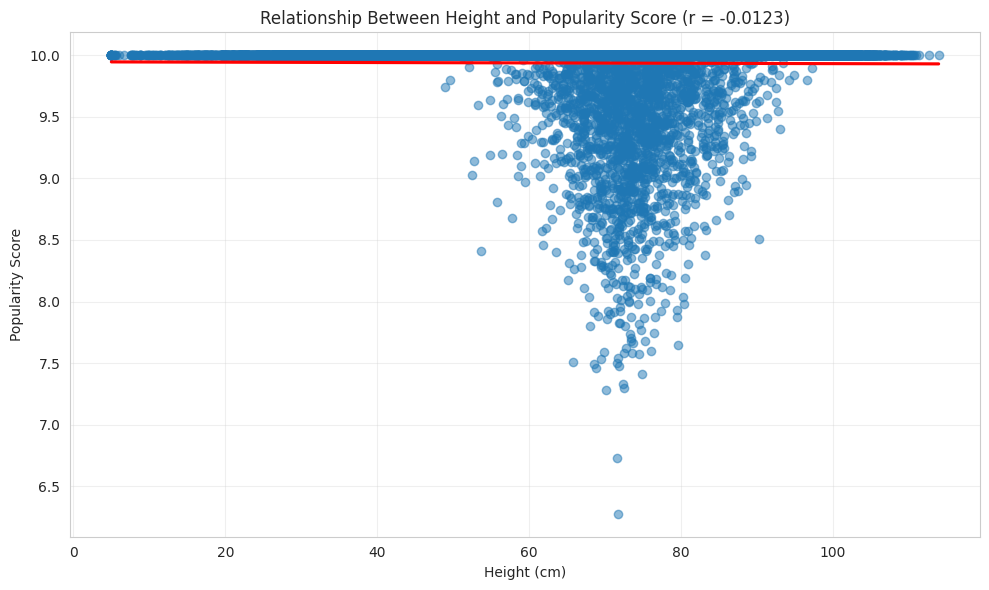


Regression Analysis:
Slope: -0.0001 (change in popularity score per cm of height)
Intercept: 9.9468
R-squared: 0.0002 (proportion of variance explained)

Average popularity score by height range:
                        mean  count       std
height_bin                                   
(4.891, 26.786]    10.000000    581  0.000000
(26.786, 48.572]   10.000000   2680  0.000000
(48.572, 70.359]    9.923932   4527  0.265812
(70.359, 92.145]    9.891493   8581  0.328051
(92.145, 113.931]   9.999263   3631  0.015995


<ipython-input-23-d7155eb57497>:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_grouped = df.groupby('height_bin')['popularity_score'].agg(['mean', 'count', 'std'])


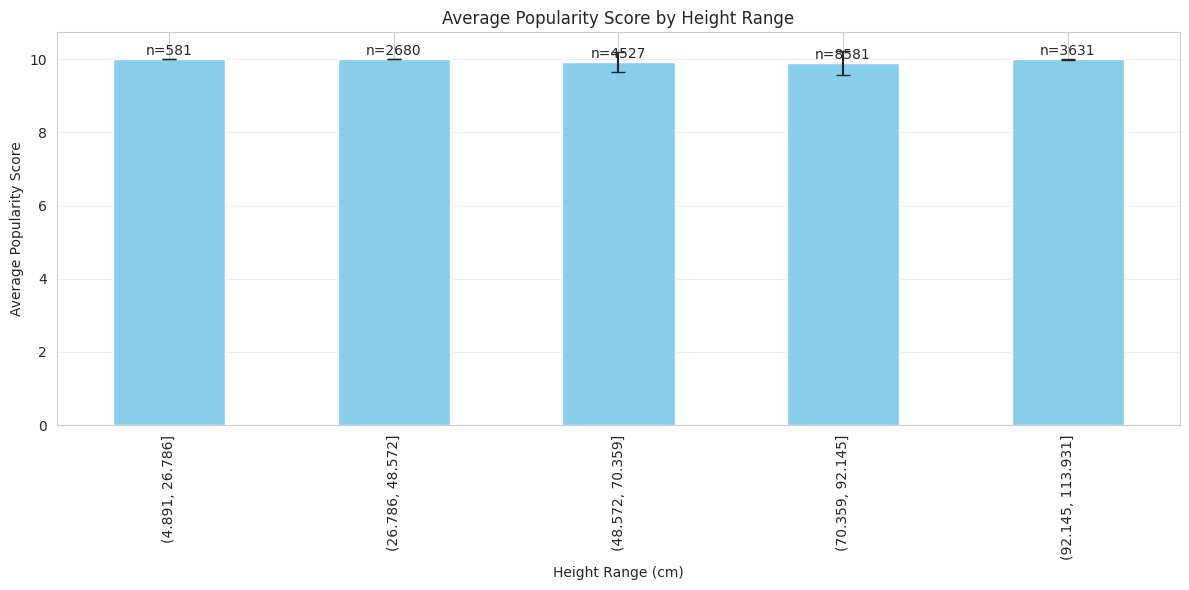

<Figure size 1200x800 with 0 Axes>

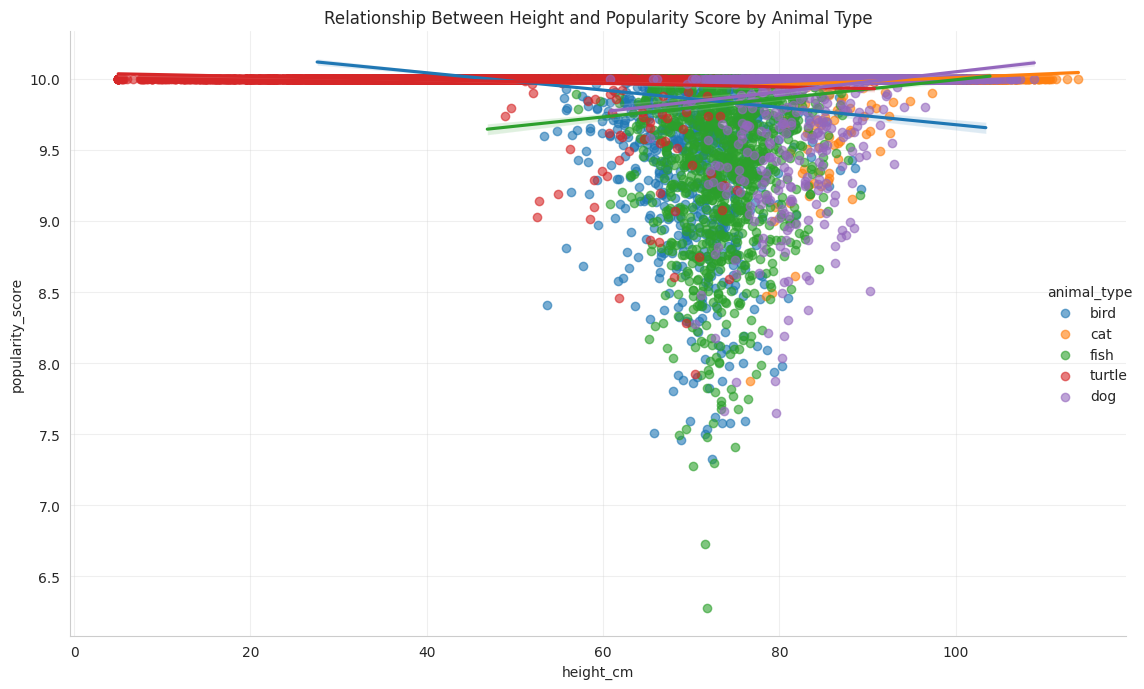

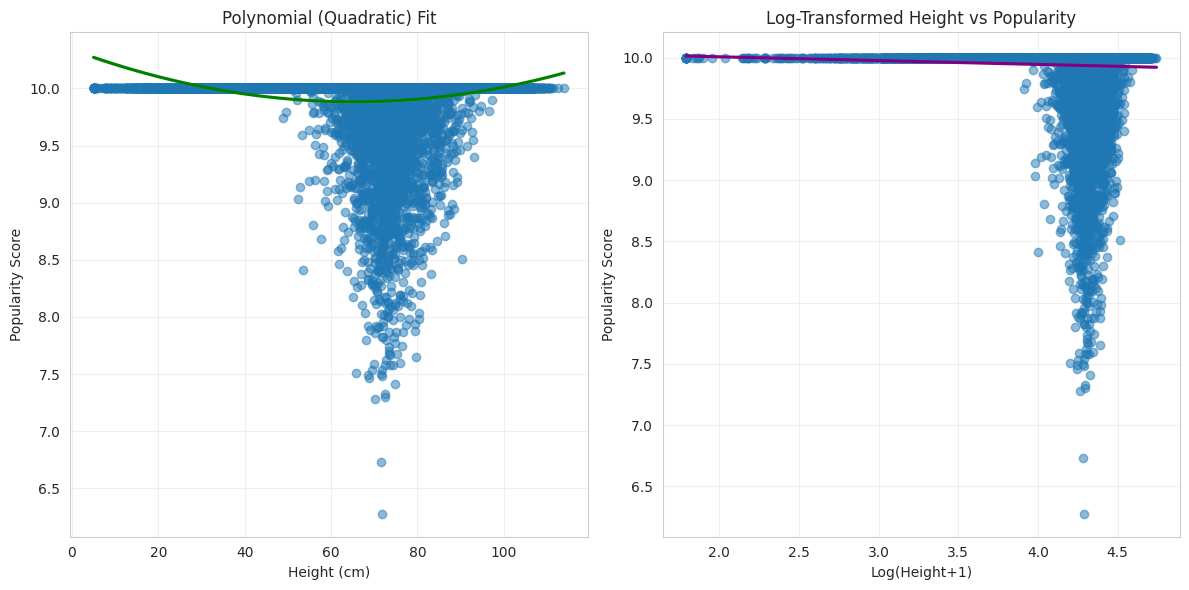


ANOVA Results - Testing if popularity differs across height groups:
                    df       sum_sq    mean_sq           F         PR(>F)
C(height_bin)      4.0    45.545935  11.386484  183.005882  2.709112e-154
Residual       19995.0  1244.073346   0.062219         NaN            NaN


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

# Assume df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# 1. Check for missing values in relevant columns
print("Missing values:")
print(df[['height_cm', 'popularity_score']].isnull().sum())

# 2. Calculate correlation coefficient
correlation = df['height_cm'].corr(df['popularity_score'])
print(f"\nPearson correlation between height and popularity score: {correlation:.4f}")

# Interpret the correlation
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "positive" if correlation > 0 else "negative"
print(f"This indicates a {strength} {direction} relationship.")

# 3. Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='height_cm', y='popularity_score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Relationship Between Height and Popularity Score (r = {correlation:.4f})')
plt.xlabel('Height (cm)')
plt.ylabel('Popularity Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Linear regression analysis
X = df[['height_cm']]
y = df['popularity_score']

model = LinearRegression()
model.fit(X, y)

# Get regression metrics
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"\nRegression Analysis:")
print(f"Slope: {slope:.4f} (change in popularity score per cm of height)")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_squared:.4f} (proportion of variance explained)")

# 5. Binned analysis - Group by height ranges and see average popularity
df['height_bin'] = pd.cut(df['height_cm'], bins=5)
height_grouped = df.groupby('height_bin')['popularity_score'].agg(['mean', 'count', 'std'])
print("\nAverage popularity score by height range:")
print(height_grouped)

# Plot the binned analysis
plt.figure(figsize=(12, 6))
ax = height_grouped['mean'].plot(kind='bar', yerr=height_grouped['std'], capsize=5, color='skyblue')
plt.title('Average Popularity Score by Height Range')
plt.xlabel('Height Range (cm)')
plt.ylabel('Average Popularity Score')
plt.grid(axis='y', alpha=0.3)

# Add the count of animals in each bin
for i, count in enumerate(height_grouped['count']):
    plt.text(i, height_grouped['mean'].iloc[i] + 0.1, f"n={count}", ha='center')

plt.tight_layout()
plt.show()

# 6. Check if the relationship is different across animal types
plt.figure(figsize=(12, 8))
sns.lmplot(x='height_cm', y='popularity_score', hue='animal_type', data=df,
           height=7, aspect=1.5, legend=True, scatter_kws={'alpha':0.6})
plt.title('Relationship Between Height and Popularity Score by Animal Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Non-linear relationships - check if there's a non-linear pattern
plt.figure(figsize=(12, 6))

# Polynomial fit
plt.subplot(1, 2, 1)
sns.regplot(x='height_cm', y='popularity_score', data=df,
            scatter_kws={'alpha':0.5}, order=2, line_kws={'color':'green'})
plt.title('Polynomial (Quadratic) Fit')
plt.xlabel('Height (cm)')
plt.ylabel('Popularity Score')
plt.grid(alpha=0.3)

# Log transformation - might reveal different patterns
plt.subplot(1, 2, 2)
df['log_height'] = np.log1p(df['height_cm'])  # log(1+x) to handle possible zeros
sns.regplot(x='log_height', y='popularity_score', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})
plt.title('Log-Transformed Height vs Popularity')
plt.xlabel('Log(Height+1)')
plt.ylabel('Popularity Score')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 8. ANOVA - check if mean popularity scores differ significantly across height groups
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Create a model and run ANOVA
model = ols('popularity_score ~ C(height_bin)', data=df).fit()
anova_results = anova_lm(model)
print("\nANOVA Results - Testing if popularity differs across height groups:")
print(anova_results)

## Which animal type mentions films most often in their social media?

Animal Types Ranked by Total Film Mentions in Social Media:
             total_film_mentions  avg_film_mentions  count
animal_type                                               
bird                        2395            0.59875   4000
cat                         1596            0.39900   4000
fish                         417            0.10425   4000
turtle                       398            0.09950   4000
dog                          390            0.09750   4000

The animal type that mentions films most often is: bird
Total film mentions: 2395.0
Average film mentions per bird: 0.60


<ipython-input-24-761c4b4d51a4>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


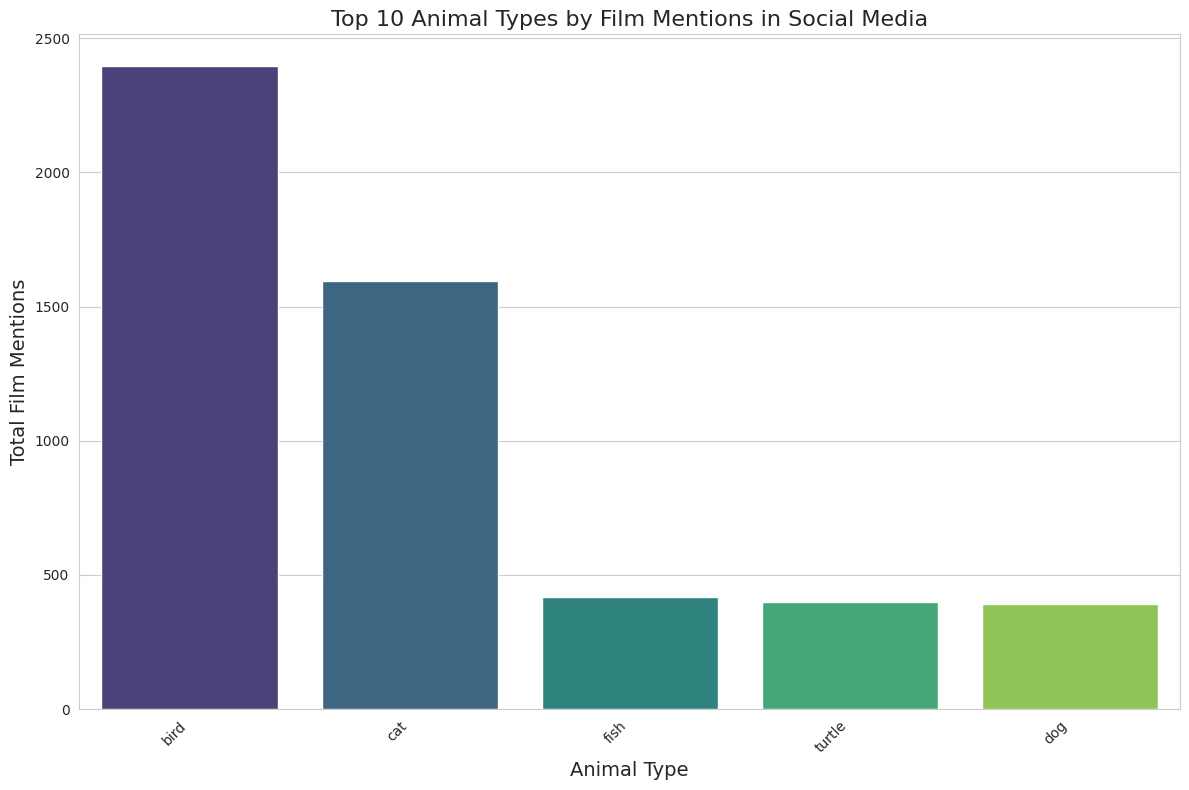

<ipython-input-24-761c4b4d51a4>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


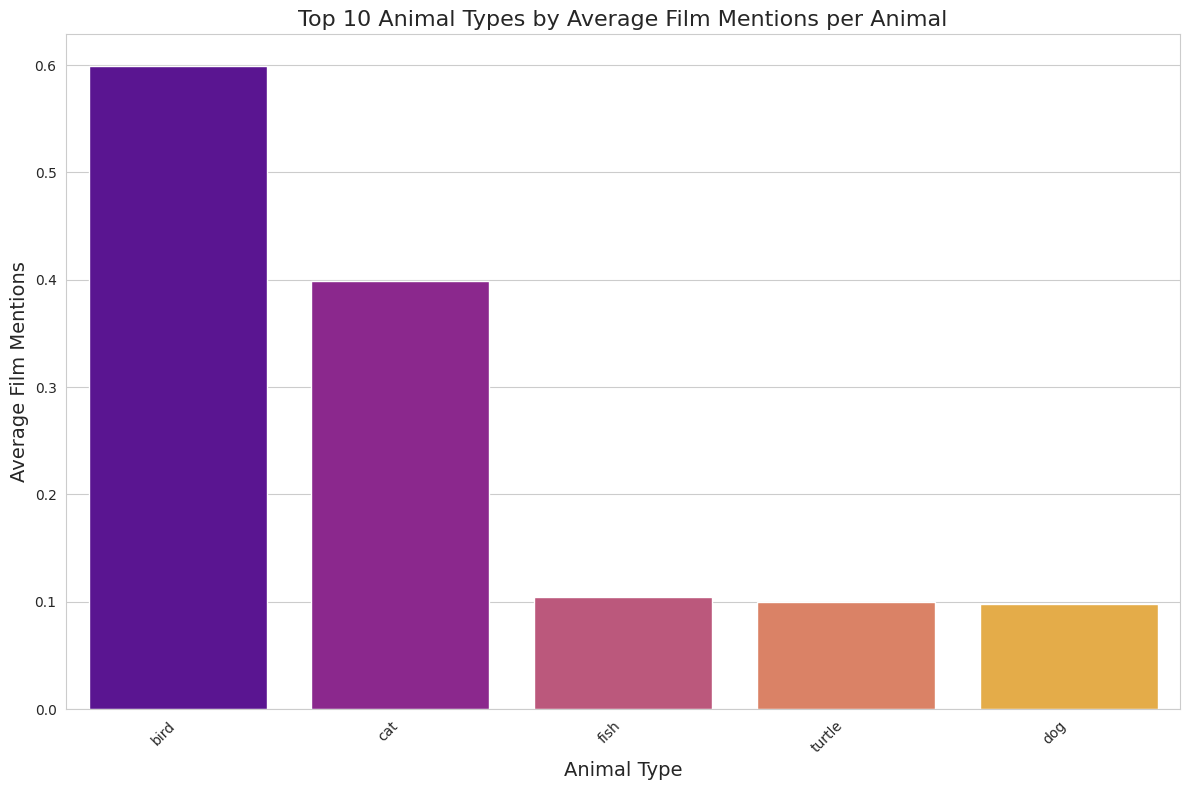


Examples of bird social media posts with film mentions:

Example 1 (Mentions: 2):
That **SCENE** in the **FILM** where the bird speaks? Completely unrealistic dialogue. #BadWriting

Example 2 (Mentions: 2):
That **SCENE** in the **FILM** where the bird speaks? Completely unrealistic dialogue. #BadWriting

Example 3 (Mentions: 2):
That **SCENE** in the **FILM** where the bird speaks? Completely unrealistic dialogue. #BadWriting

Example 4 (Mentions: 2):
That **SCENE** in the **FILM** where the bird speaks? Completely unrealistic dialogue. #BadWriting

Example 5 (Mentions: 2):
That **SCENE** in the **FILM** where the bird speaks? Completely unrealistic dialogue. #BadWriting


In [24]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assume df is your DataFrame with the animal data
# If you need to load it:
# df = pd.read_csv('your_data.csv')

# Define a function to count film mentions in text
def count_film_mentions(text):
    # Check if the text is a string (not NaN)
    if not isinstance(text, str):
        return 0

    # Define a list of film-related keywords to search for
    film_keywords = [
        'movie', 'film', 'cinema', 'watch', 'actor', 'actress', 'director',
        'hollywood', 'netflix', 'theater', 'cinema', 'blockbuster', 'screenplay',
        'scene', 'character', 'plot', 'oscar', 'golden globe', 'award'
    ]

    # Count occurrences of film keywords (case insensitive)
    count = 0
    text_lower = text.lower()
    for keyword in film_keywords:
        count += len(re.findall(r'\b' + re.escape(keyword) + r'\b', text_lower))

    return count

# Apply the function to count film mentions in social media posts
df['film_mentions'] = df['social_media'].apply(count_film_mentions)

# Group by animal_type and calculate total and average film mentions
film_mentions_by_animal = df.groupby('animal_type').agg(
    total_film_mentions=('film_mentions', 'sum'),
    avg_film_mentions=('film_mentions', 'mean'),
    count=('film_mentions', 'count')
).sort_values('total_film_mentions', ascending=False)

# Print the results
print("Animal Types Ranked by Total Film Mentions in Social Media:")
print(film_mentions_by_animal)

# Identify the animal type with the most film mentions
top_animal = film_mentions_by_animal.index[0]
total_mentions = film_mentions_by_animal.iloc[0]['total_film_mentions']
avg_mentions = film_mentions_by_animal.iloc[0]['avg_film_mentions']

print(f"\nThe animal type that mentions films most often is: {top_animal}")
print(f"Total film mentions: {total_mentions}")
print(f"Average film mentions per {top_animal}: {avg_mentions:.2f}")

# Create a visualization of the top 10 animal types by film mentions
plt.figure(figsize=(12, 8))
sns.barplot(
    data=film_mentions_by_animal.head(10).reset_index(),
    x='animal_type',
    y='total_film_mentions',
    palette='viridis'
)
plt.title('Top 10 Animal Types by Film Mentions in Social Media', fontsize=16)
plt.xlabel('Animal Type', fontsize=14)
plt.ylabel('Total Film Mentions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optional: Create a second chart showing average mentions per animal
plt.figure(figsize=(12, 8))
sns.barplot(
    data=film_mentions_by_animal.head(10).reset_index(),
    x='animal_type',
    y='avg_film_mentions',
    palette='plasma'
)
plt.title('Top 10 Animal Types by Average Film Mentions per Animal', fontsize=16)
plt.xlabel('Animal Type', fontsize=14)
plt.ylabel('Average Film Mentions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optional: Get examples of social media posts with film mentions
def highlight_film_keywords(text):
    if not isinstance(text, str):
        return ''

    film_keywords = [
        'movie', 'film', 'cinema', 'watch', 'actor', 'actress', 'director',
        'hollywood', 'netflix', 'theater', 'cinema', 'blockbuster', 'screenplay',
        'scene', 'character', 'plot', 'oscar', 'golden globe', 'award'
    ]

    # Create a copy of the text
    highlighted = text

    # Highlight each keyword (this is a simple approach)
    for keyword in film_keywords:
        pattern = re.compile(r'\b' + re.escape(keyword) + r'\b', re.IGNORECASE)
        highlighted = pattern.sub(f"**{keyword.upper()}**", highlighted)

    return highlighted

# Get examples of posts with film mentions from the top animal type
top_animal_examples = df[df['animal_type'] == top_animal].sort_values('film_mentions', ascending=False).head(5)

print(f"\nExamples of {top_animal} social media posts with film mentions:")
for i, (_, row) in enumerate(top_animal_examples.iterrows(), 1):
    print(f"\nExample {i} (Mentions: {row['film_mentions']}):")
    print(highlight_film_keywords(row['social_media']))

## Which animal type has the most positive sentiment in their social media posts?

Animal types ranked by average social media sentiment (most positive to least):
  animal_type      mean  count       std
2         dog  0.414436   4000  0.340802
0        bird  0.271846   4000  0.411904
4      turtle  0.169794   4000  0.241702
1         cat  0.076779   4000  0.180350
3        fish -0.043345   4000  0.399058

The animal type with the most positive sentiment is: dog
With an average sentiment score of: 0.4144


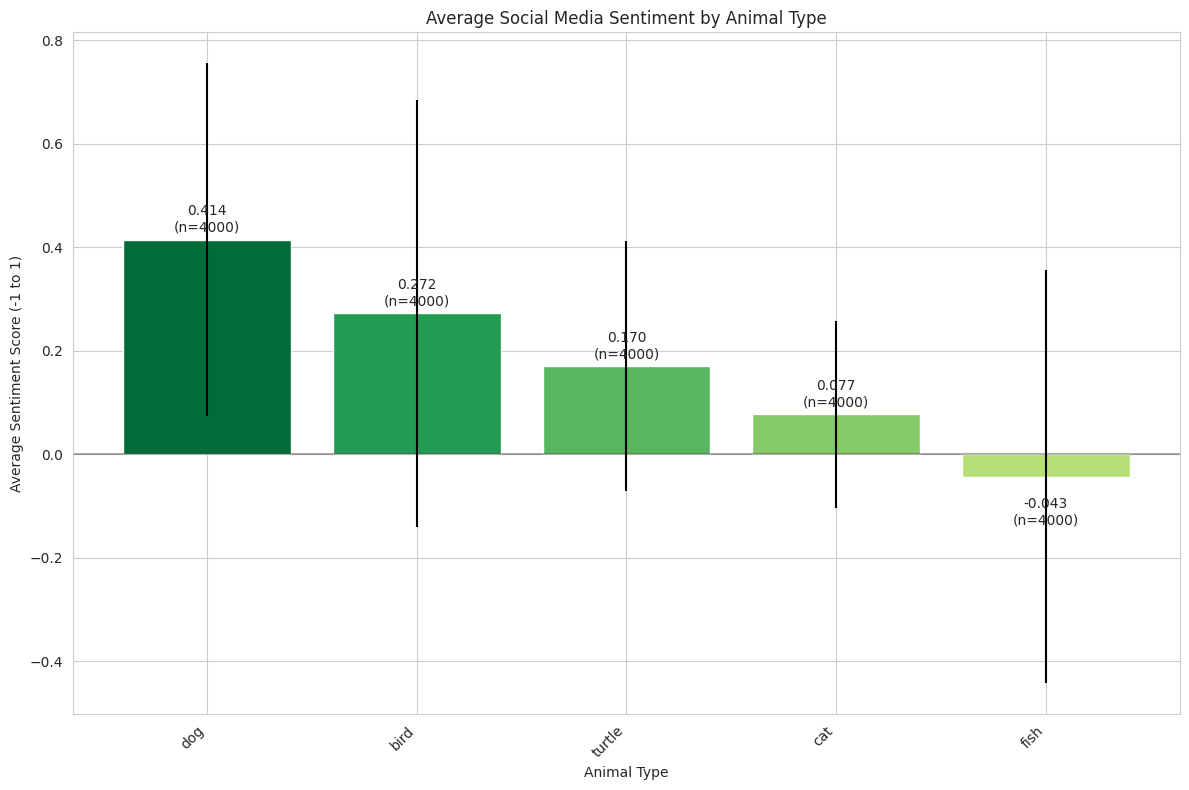


Statistically significant differences in sentiment between animal types:
  animal_type_1 animal_type_2  mean_diff        p_value  significant
1          bird          fish   0.315191  1.198146e-246         True
0          bird           cat   0.195067  2.117738e-155         True
4           cat          fish   0.120124   1.052214e-65         True
2          bird        turtle   0.102053   4.612480e-41         True
5           cat        turtle  -0.093015   1.114721e-82         True
3          bird           dog  -0.142590   1.005569e-62         True
7          fish        turtle  -0.213139  6.192089e-173         True
9        turtle           dog  -0.244643  5.645357e-275         True
6           cat           dog  -0.337657   0.000000e+00         True
8          fish           dog  -0.457781   0.000000e+00         True

Word sentiment analysis for the most positive animal type (dog):
Top 10 most positive words:
  - best: sentiment=1.000, count=773
  - incredible: sentiment=0.900, cou

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob  # For sentiment analysis

# Assume df is your DataFrame with the animal data
# df = pd.read_csv('your_data.csv')

# Function to analyze sentiment in text
def get_sentiment(text):
    if pd.isna(text) or text == '':
        return np.nan
    return TextBlob(str(text)).sentiment.polarity  # Returns value between -1 (negative) and 1 (positive)

# Apply sentiment analysis to the social_media column
df['sentiment_score'] = df['social_media'].apply(get_sentiment)

# Group by animal_type and calculate average sentiment
sentiment_by_animal = df.groupby('animal_type')['sentiment_score'].agg(['mean', 'count', 'std']).reset_index()
sentiment_by_animal = sentiment_by_animal.sort_values('mean', ascending=False)

# Print the results
print("Animal types ranked by average social media sentiment (most positive to least):")
print(sentiment_by_animal)

print(f"\nThe animal type with the most positive sentiment is: {sentiment_by_animal.iloc[0]['animal_type']}")
print(f"With an average sentiment score of: {sentiment_by_animal.iloc[0]['mean']:.4f}")

# Create a bar chart to visualize the comparison
plt.figure(figsize=(12, 8))
bars = plt.bar(sentiment_by_animal['animal_type'], sentiment_by_animal['mean'],
               yerr=sentiment_by_animal['std'],
               color=plt.cm.RdYlGn(0.7 * (sentiment_by_animal['mean'] + 1)))  # Color based on sentiment

plt.title('Average Social Media Sentiment by Animal Type')
plt.xlabel('Animal Type')
plt.ylabel('Average Sentiment Score (-1 to 1)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add a line at y=0 for reference

# Add the values and sample size on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = sentiment_by_animal.iloc[i]['count']
    plt.text(bar.get_x() + bar.get_width()/2.,
             height + (0.01 if height >= 0 else -0.04),
             f'{height:.3f}\n(n={count})',
             ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

# Optional: Advanced analysis - Find which animal types have significantly different sentiment
from scipy import stats

# Function for pairwise statistical tests
def compare_sentiment_pairwise(df):
    animal_types = df['animal_type'].unique()
    results = []

    for i in range(len(animal_types)):
        for j in range(i+1, len(animal_types)):
            type1, type2 = animal_types[i], animal_types[j]
            group1 = df[df['animal_type'] == type1]['sentiment_score'].dropna()
            group2 = df[df['animal_type'] == type2]['sentiment_score'].dropna()

            if len(group1) > 1 and len(group2) > 1:  # Need at least 2 samples for t-test
                t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                significant = p_value < 0.05

                results.append({
                    'animal_type_1': type1,
                    'animal_type_2': type2,
                    'mean_diff': group1.mean() - group2.mean(),
                    'p_value': p_value,
                    'significant': significant
                })

    return pd.DataFrame(results)

# Get significant differences
significant_differences = compare_sentiment_pairwise(df)
if not significant_differences.empty:
    print("\nStatistically significant differences in sentiment between animal types:")
    print(significant_differences[significant_differences['significant']].sort_values('mean_diff', ascending=False))

# Optional: Word cloud of positive and negative terms by animal type
from wordcloud import WordCloud
from collections import Counter
import re

# Function to extract words and their sentiment
def sentiment_word_analysis(animal_type):
    # Filter data for the specified animal type
    animal_posts = df[df['animal_type'] == animal_type]['social_media'].dropna()

    if len(animal_posts) == 0:
        return None

    # Combine all text
    combined_text = ' '.join(animal_posts.astype(str))

    # Extract words
    words = re.findall(r'\b[a-zA-Z]{3,}\b', combined_text.lower())

    # Get sentiment for each word
    word_sentiments = {word: TextBlob(word).sentiment.polarity for word in set(words)}

    # Count word frequency
    word_counts = Counter(words)

    # Create word-sentiment dictionary with frequency
    word_sentiment_freq = {word: {'sentiment': word_sentiments[word], 'count': count}
                          for word, count in word_counts.items()}

    return word_sentiment_freq

# Generate word clouds for the most positive and most negative animal types
if not sentiment_by_animal.empty:
    most_positive_type = sentiment_by_animal.iloc[0]['animal_type']
    most_negative_idx = sentiment_by_animal['mean'].idxmin()
    most_negative_type = sentiment_by_animal.loc[most_negative_idx, 'animal_type']

    print(f"\nWord sentiment analysis for the most positive animal type ({most_positive_type}):")
    word_sentiments_positive = sentiment_word_analysis(most_positive_type)

    if word_sentiments_positive:
        # Sort words by sentiment, then by frequency
        sorted_words = sorted(word_sentiments_positive.items(),
                              key=lambda x: (x[1]['sentiment'], x[1]['count']),
                              reverse=True)

        # Print the top 10 most positive words
        print("Top 10 most positive words:")
        for word, data in sorted_words[:10]:
            print(f"  - {word}: sentiment={data['sentiment']:.3f}, count={data['count']}")

# more age-run tests

<ipython-input-26-1f69736ecbc0>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  run_by_age = dogs_df.groupby('age_group')['can_run'].mean() * 100


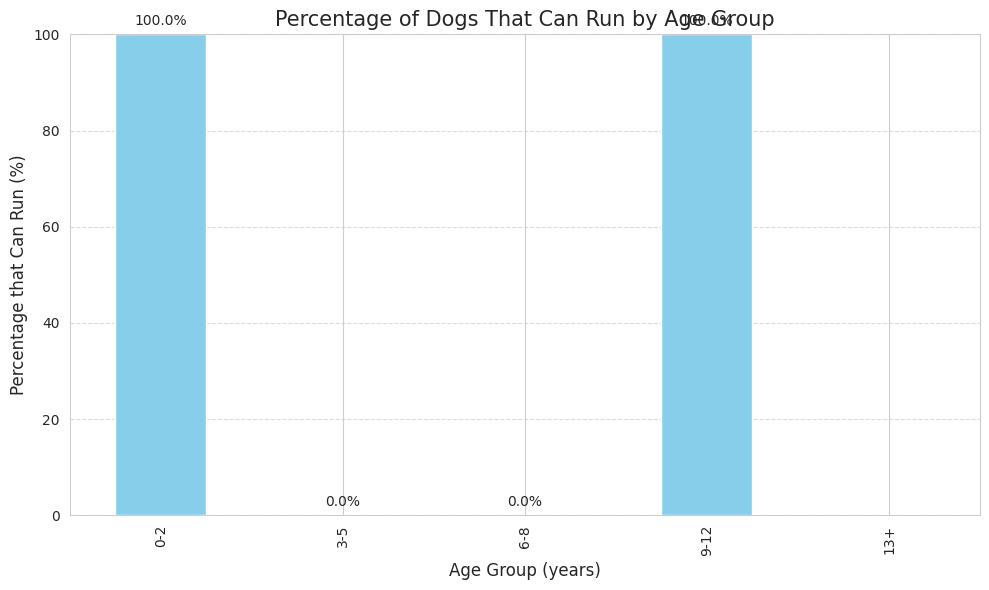

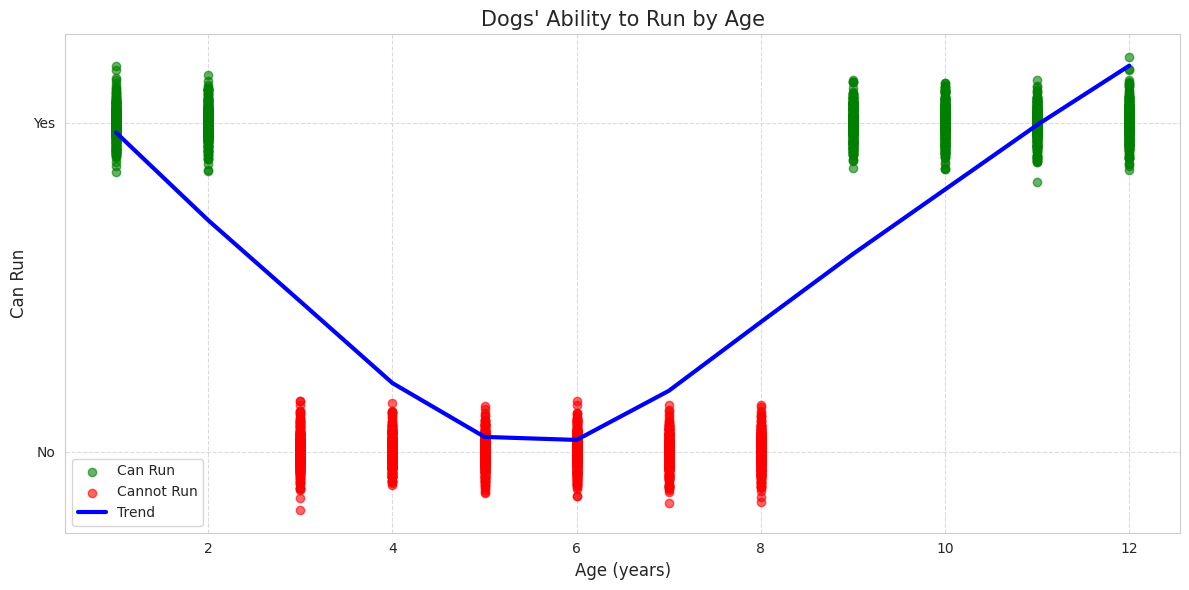

<ipython-input-26-1f69736ecbc0>:127: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = result.pvalues[1]
<ipython-input-26-1f69736ecbc0>:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = result.params[1]


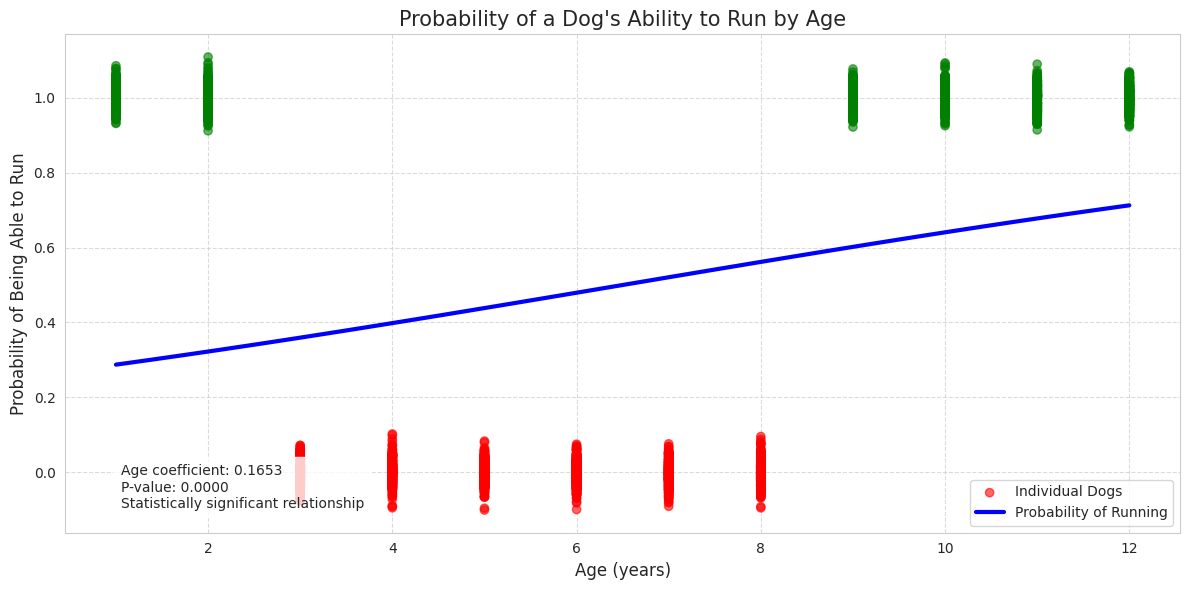

Age statistics by running ability:
         count      mean       std  min  max
can_run                                     
False     2005  5.527182  1.701498    3    8
True      1995  7.412030  4.391299    1   12

T-test comparing ages: t=17.882, p=0.0000
The age difference between dogs that can and cannot run is statistically significant


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the mentioned fields
# Filter the data to include only dogs
dogs_df = df[df['animal_type'] == 'dog'].copy()

# Check data types and convert if necessary
if not pd.api.types.is_bool_dtype(dogs_df['can_run']):
    # If can_run is not boolean, try to convert it
    # This handles cases where it might be stored as 0/1 or 'True'/'False'
    dogs_df['can_run'] = dogs_df['can_run'].astype(bool)

# Method 1: Age Group Analysis
# Let's group dogs by age ranges and see the proportion that can run
def plot_run_ability_by_age_groups():
    # Create age groups (adjust bins as needed)
    dogs_df['age_group'] = pd.cut(dogs_df['age_years'],
                                bins=[0, 2, 5, 8, 12, 20],
                                labels=['0-2', '3-5', '6-8', '9-12', '13+'])

    # Calculate percentage that can run in each age group
    run_by_age = dogs_df.groupby('age_group')['can_run'].mean() * 100

    # Plot
    plt.figure(figsize=(10, 6))
    run_by_age.plot(kind='bar', color='skyblue')
    plt.title("Percentage of Dogs That Can Run by Age Group", fontsize=15)
    plt.xlabel("Age Group (years)", fontsize=12)
    plt.ylabel("Percentage that Can Run (%)", fontsize=12)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels on bars
    for i, v in enumerate(run_by_age):
        plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.savefig('dogs_run_by_age_group.png')
    plt.show()

# Method 2: Scatter Plot with Jitter
def plot_run_ability_scatter():
    plt.figure(figsize=(12, 6))

    # Add jitter to help visualization (since can_run is binary)
    jitter = np.random.normal(0, 0.05, size=len(dogs_df))

    # Plot dogs that can run
    run_true = dogs_df[dogs_df['can_run'] == True]
    plt.scatter(run_true['age_years'], run_true['can_run'].astype(int) + jitter[dogs_df['can_run']],
                color='green', alpha=0.6, label='Can Run')

    # Plot dogs that cannot run
    run_false = dogs_df[dogs_df['can_run'] == False]
    plt.scatter(run_false['age_years'], run_false['can_run'].astype(int) + jitter[~dogs_df['can_run']],
                color='red', alpha=0.6, label='Cannot Run')

    plt.title("Dogs' Ability to Run by Age", fontsize=15)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Can Run", fontsize=12)
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Add a trend line (LOWESS)
    try:
        from statsmodels.nonparametric.smoothers_lowess import lowess
        x = dogs_df['age_years']
        y = dogs_df['can_run'].astype(int)
        z = lowess(y, x, frac=0.6)
        plt.plot(z[:, 0], z[:, 1], 'b-', lw=3, label='Trend')
        plt.legend()
    except:
        # If statsmodels isn't available, skip the trend line
        pass

    plt.tight_layout()
    plt.savefig('dogs_run_scatter.png')
    plt.show()

# Method 3: Logistic Regression Plot
def plot_logistic_regression():
    from sklearn.linear_model import LogisticRegression
    import statsmodels.api as sm

    # Prepare data
    X = dogs_df['age_years'].values.reshape(-1, 1)
    y = dogs_df['can_run'].astype(int)

    # Fit logistic regression
    model = LogisticRegression()
    model.fit(X, y)

    # Create a range of ages for prediction
    age_range = np.linspace(dogs_df['age_years'].min(), dogs_df['age_years'].max(), 100).reshape(-1, 1)

    # Get predicted probabilities
    probs = model.predict_proba(age_range)[:, 1]

    # Plot
    plt.figure(figsize=(12, 6))

    # Scatter plot with some jitter for actual data
    jitter = np.random.normal(0, 0.03, size=len(dogs_df))
    plt.scatter(dogs_df['age_years'], dogs_df['can_run'].astype(int) + jitter,
                alpha=0.6, c=dogs_df['can_run'].map({True: 'green', False: 'red'}),
                label='Individual Dogs')

    # Plot the logistic curve
    plt.plot(age_range, probs, 'b-', linewidth=3, label='Probability of Running')

    plt.title("Probability of a Dog's Ability to Run by Age", fontsize=15)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Probability of Being Able to Run", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Add statistical summary
    X_with_const = sm.add_constant(X)
    logit_model = sm.Logit(y, X_with_const)
    result = logit_model.fit(disp=0)

    # Add annotation with p-value
    pvalue = result.pvalues[1]
    coef = result.params[1]
    annotation = f"Age coefficient: {coef:.4f}\nP-value: {pvalue:.4f}"
    if pvalue < 0.05:
        annotation += "\nStatistically significant relationship"
    else:
        annotation += "\nNo statistically significant relationship"

    plt.annotate(annotation, xy=(0.05, 0.05), xycoords='axes fraction',
                 fontsize=10, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

    plt.tight_layout()
    plt.savefig('dogs_run_logistic.png')
    plt.show()

# Execute all plot functions
plot_run_ability_by_age_groups()
plot_run_ability_scatter()
plot_logistic_regression()

# Bonus: Summary statistics table
age_run_stats = dogs_df.groupby('can_run')['age_years'].agg(['count', 'mean', 'std', 'min', 'max'])
print("Age statistics by running ability:")
print(age_run_stats)

# Optionally, perform a statistical test to compare ages of dogs that can vs. cannot run
from scipy import stats

run_ages = dogs_df[dogs_df['can_run']]['age_years']
cant_run_ages = dogs_df[~dogs_df['can_run']]['age_years']

t_stat, p_value = stats.ttest_ind(run_ages, cant_run_ages, equal_var=False)
print(f"\nT-test comparing ages: t={t_stat:.3f}, p={p_value:.4f}")
print(f"The age difference between dogs that can and cannot run is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}")


Detailed Table of Dogs' Ability to Run by Age:
 Age (years)  Total Dogs  Dogs That Can Run  Dogs That Cannot Run Percentage That Can Run
           1         356                356                     0                  100.0%
           2         328                328                     0                  100.0%
           3         328                  0                   328                    0.0%
           4         318                  0                   318                    0.0%
           5         339                  0                   339                    0.0%
           6         347                  0                   347                    0.0%
           7         335                  0                   335                    0.0%
           8         338                  0                   338                    0.0%
           9         327                327                     0                  100.0%
          10         325                325         

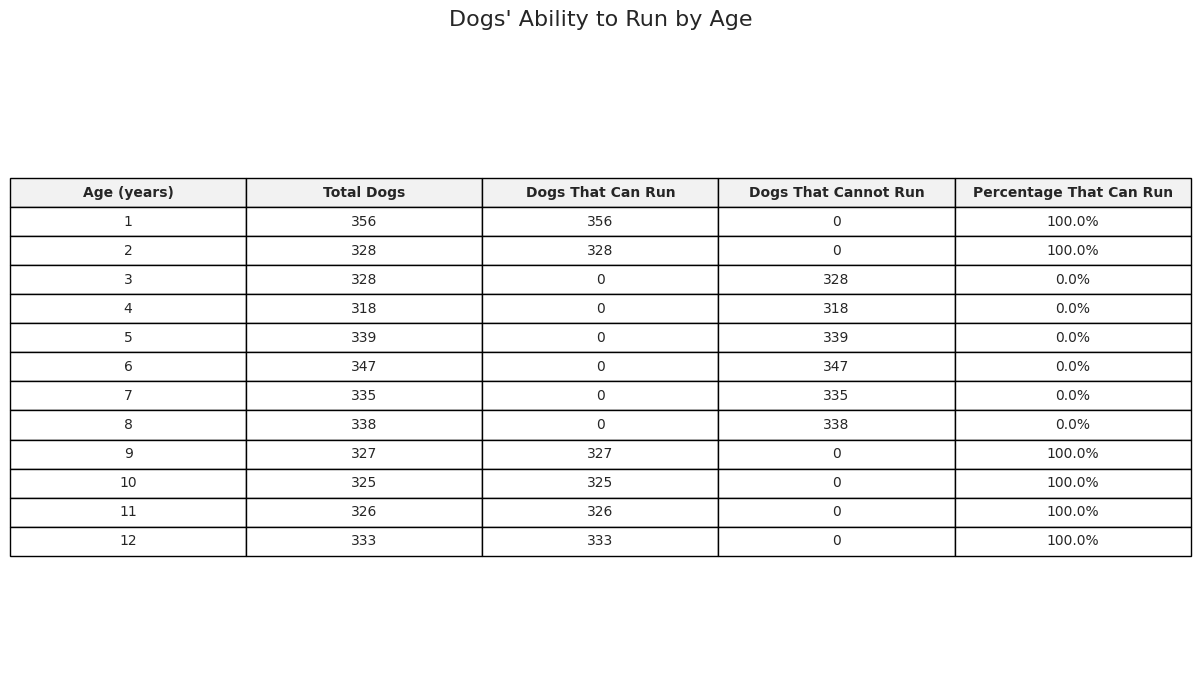

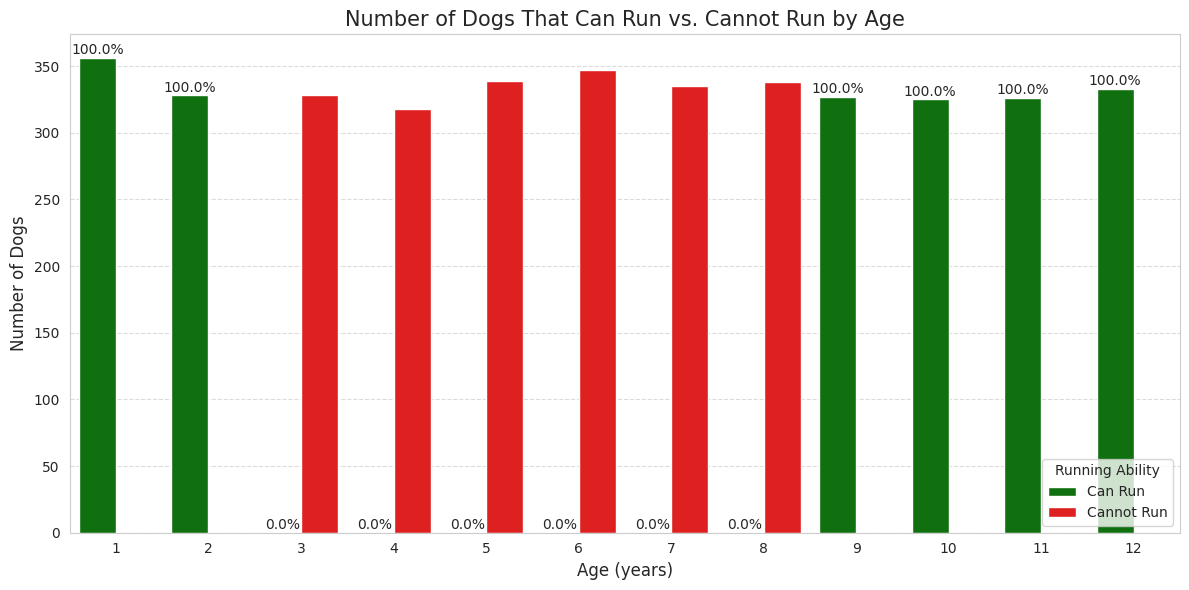

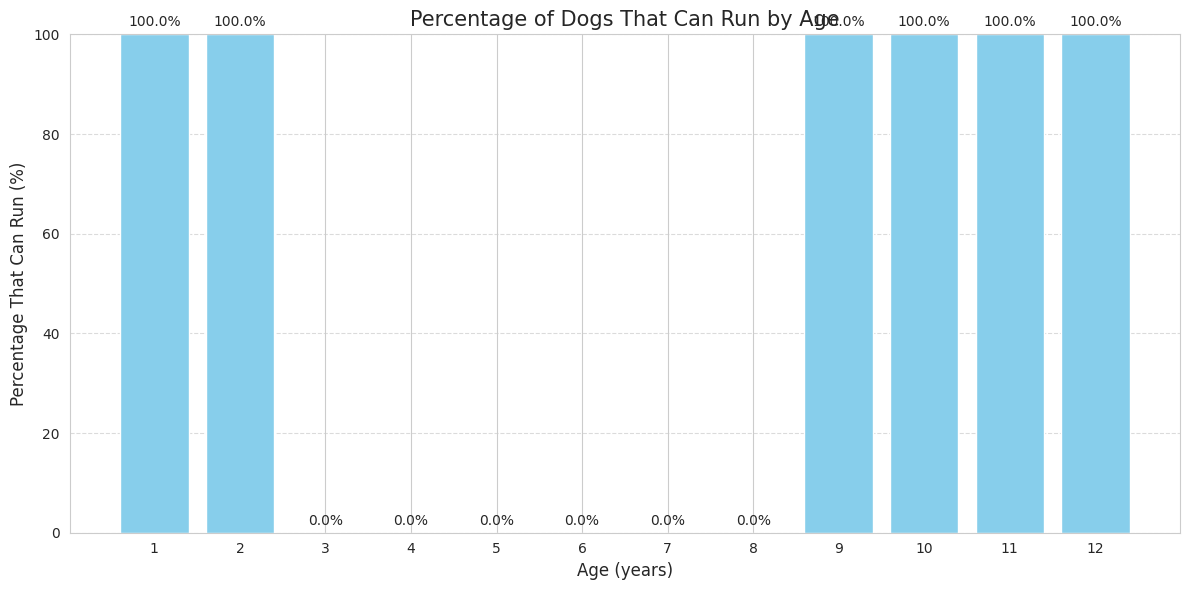

Table exported to 'dogs_run_ability_by_age.csv'


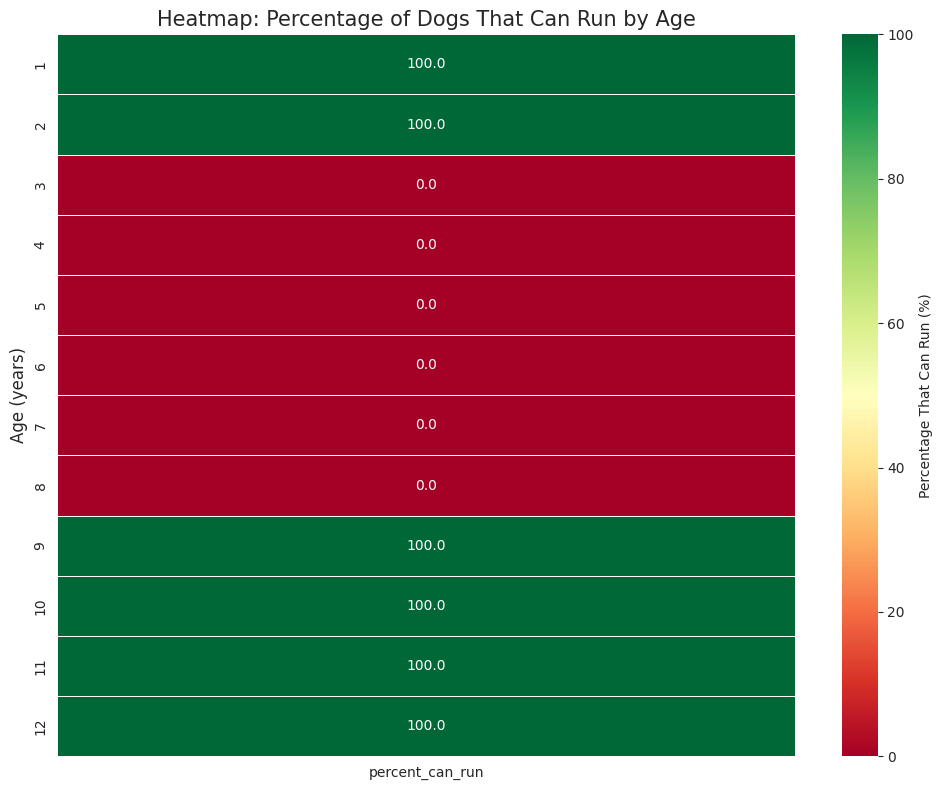

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the mentioned fields
# Filter the data to include only dogs
dogs_df = df[df['animal_type'] == 'dog'].copy()

# Check data types and convert if necessary
if not pd.api.types.is_bool_dtype(dogs_df['can_run']):
    # If can_run is not boolean, try to convert it
    dogs_df['can_run'] = dogs_df['can_run'].astype(bool)

# Round ages to nearest integer for simple age-based analysis
dogs_df['age_rounded'] = dogs_df['age_years'].round().astype(int)

# Create a table showing running ability statistics by age
def create_run_ability_table():
    # Group by rounded age and calculate statistics
    age_run_stats = dogs_df.groupby('age_rounded')['can_run'].agg([
        ('total_dogs', 'count'),
        ('can_run_count', lambda x: x.sum()),
        ('cannot_run_count', lambda x: (~x).sum()),
        ('percent_can_run', lambda x: x.mean() * 100)
    ]).reset_index()

    # Sort by age
    age_run_stats = age_run_stats.sort_values('age_rounded')

    # Format the percentage column
    age_run_stats['percent_can_run'] = age_run_stats['percent_can_run'].round(1).astype(str) + '%'

    # Rename columns for better display
    age_run_stats = age_run_stats.rename(columns={
        'age_rounded': 'Age (years)',
        'total_dogs': 'Total Dogs',
        'can_run_count': 'Dogs That Can Run',
        'cannot_run_count': 'Dogs That Cannot Run',
        'percent_can_run': 'Percentage That Can Run'
    })

    return age_run_stats

# Get the table data
run_ability_table = create_run_ability_table()

# Display the table
print("\nDetailed Table of Dogs' Ability to Run by Age:")
print(run_ability_table.to_string(index=False))

# Create a visual table using matplotlib
def plot_run_ability_table():
    fig, ax = plt.subplots(figsize=(12, len(run_ability_table) * 0.5 + 1))
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    table = ax.table(
        cellText=run_ability_table.values,
        colLabels=run_ability_table.columns,
        loc='center',
        cellLoc='center',
        colColours=['#f2f2f2'] * len(run_ability_table.columns)
    )

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    # Highlight header
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_text_props(weight='bold')

    plt.title("Dogs' Ability to Run by Age", fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig('dogs_run_table.png', bbox_inches='tight', dpi=300)
    plt.show()

# Plot the visual table
plot_run_ability_table()

# Let's also visualize this data
def plot_run_ability_by_age():
    # Convert to long format for plotting
    plot_data = dogs_df.groupby('age_rounded')['can_run'].agg([
        ('Can Run', lambda x: x.sum()),
        ('Cannot Run', lambda x: (~x).sum())
    ]).reset_index()

    # Convert to long format
    plot_data_long = pd.melt(
        plot_data,
        id_vars=['age_rounded'],
        value_vars=['Can Run', 'Cannot Run'],
        var_name='Ability',
        value_name='Count'
    )

    # Create plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='age_rounded', y='Count', hue='Ability', data=plot_data_long,
                palette={'Can Run': 'green', 'Cannot Run': 'red'})

    # Add percentage labels on the "Can Run" bars
    for age in plot_data['age_rounded'].unique():
        age_data = plot_data[plot_data['age_rounded'] == age]
        total = age_data['Can Run'].values[0] + age_data['Cannot Run'].values[0]
        percent = (age_data['Can Run'].values[0] / total) * 100

        # Find the position of the "Can Run" bar for this age
        bar_idx = plot_data_long[
            (plot_data_long['age_rounded'] == age) &
            (plot_data_long['Ability'] == 'Can Run')
        ].index[0]

        # Get the position in the plot
        bar_pos = ax.containers[0][plot_data['age_rounded'].tolist().index(age)]

        # Add text above the bar
        plt.text(
            bar_pos.get_x() + bar_pos.get_width()/2,
            bar_pos.get_height() + 0.5,
            f"{percent:.1f}%",
            ha='center', va='bottom'
        )

    plt.title("Number of Dogs That Can Run vs. Cannot Run by Age", fontsize=15)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Number of Dogs", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.legend(title='Running Ability')

    plt.tight_layout()
    plt.savefig('dogs_run_by_age_counts.png')
    plt.show()

    # Create a second plot showing just percentages
    plt.figure(figsize=(12, 6))
    percentage_data = dogs_df.groupby('age_rounded')['can_run'].mean() * 100

    bars = plt.bar(percentage_data.index, percentage_data.values, color='skyblue')

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 1,
            f"{height:.1f}%",
            ha='center',
            va='bottom'
        )

    plt.title("Percentage of Dogs That Can Run by Age", fontsize=15)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Percentage That Can Run (%)", fontsize=12)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(percentage_data.index)

    plt.tight_layout()
    plt.savefig('dogs_run_by_age_percentage.png')
    plt.show()

# Plot the visualizations
plot_run_ability_by_age()

# Export the table to CSV for further use
run_ability_table.to_csv('dogs_run_ability_by_age.csv', index=False)
print("Table exported to 'dogs_run_ability_by_age.csv'")

# Optional: Create a heatmap for a visual representation of the table
plt.figure(figsize=(10, 8))
pivot_data = dogs_df.pivot_table(
    index='age_rounded',
    values='can_run',
    aggfunc=['mean', 'count']
)

# Flatten the column hierarchy
pivot_data.columns = [f"{col[0]}_{col[1]}" for col in pivot_data.columns]
pivot_data = pivot_data.rename(columns={'mean_can_run': 'percent_can_run', 'count_can_run': 'total_dogs'})
pivot_data['percent_can_run'] = pivot_data['percent_can_run'] * 100

# Sort by age
pivot_data = pivot_data.sort_index()

# Create the heatmap
sns.heatmap(
    pivot_data[['percent_can_run']],
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Percentage That Can Run (%)'}
)
plt.title("Heatmap: Percentage of Dogs That Can Run by Age", fontsize=15)
plt.xlabel("")
plt.ylabel("Age (years)", fontsize=12)
plt.tight_layout()
plt.savefig('dogs_run_heatmap.png')
plt.show()